In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset setelah di-upload
df = pd.read_csv("aug_train.csv")  # Sesuaikan dengan nama file yang di-upload
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df_new = df[['enrollee_id','city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','last_new_job']]

In [77]:
df_new = df_new.dropna()

In [78]:
df_new.to_csv("CheckingEmployee.csv", index=False)

In [3]:
df[['target']].value_counts(normalize=True)

target
0.0       0.750652
1.0       0.249348
Name: proportion, dtype: float64

In [4]:
df = df.drop(columns=['company_size', 'company_type','enrollee_id'])
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   last_new_job            18735 non-null  object 
 9   training_hours          19158 non-null  int64  
 10  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.6+ MB


306

In [5]:
# 1. Mengecek Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]
print("Missing Values:")
print(missing_data)

Missing Values:
                     Missing Values  Percentage
gender                         4508   23.530640
enrolled_university             386    2.014824
education_level                 460    2.401086
major_discipline               2813   14.683161
experience                       65    0.339284
last_new_job                    423    2.207955


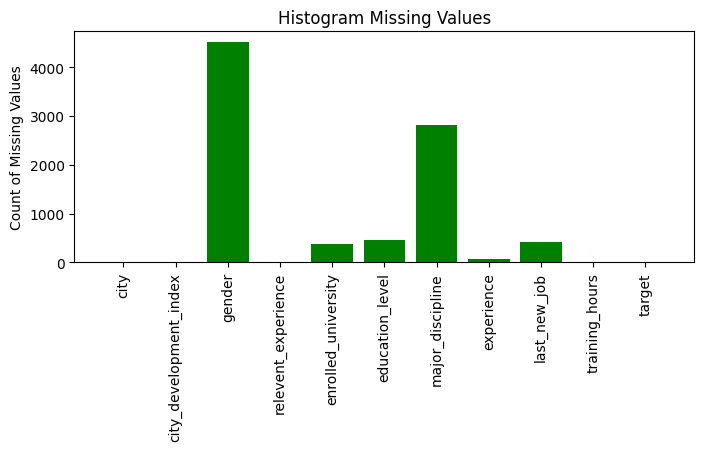

In [6]:
# Plot histogram missing value
plt.figure(figsize=(8, 3))
plt.bar(missing_values.index, missing_values.values, color='green')
plt.xticks(rotation=90)
plt.ylabel("Count of Missing Values")
plt.title("Histogram Missing Values")
plt.show()

In [7]:
# 2. Mengecek Inconsistent Entries
print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()[:10]}")

# Mengganti 'never' menjadi 0 pada kolom 'last_new_job'
df['last_new_job'] = df['last_new_job'].replace('never', 0)


Unique values in categorical columns:
city: ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114']
gender: ['Male' nan 'Female' 'Other']
relevent_experience: ['Has relevent experience' 'No relevent experience']
enrolled_university: ['no_enrollment' 'Full time course' nan 'Part time course']
education_level: ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
major_discipline: ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
experience: ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16']
last_new_job: ['1' '>4' 'never' '4' '3' '2' nan]


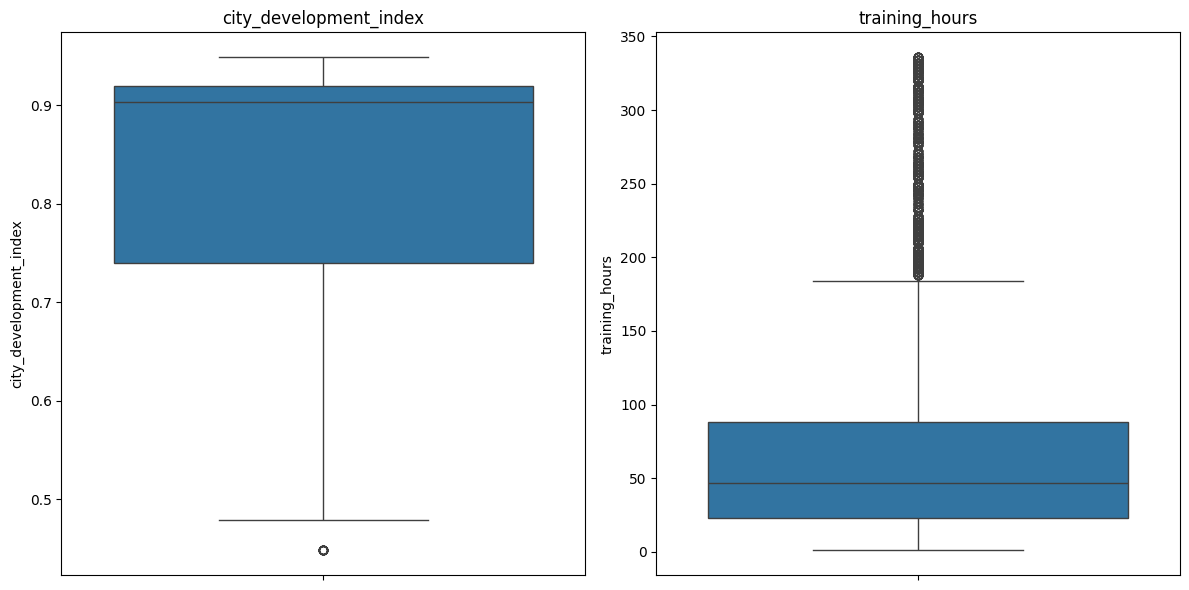


Jumlah outliers per kolom:
{'city_development_index': 17, 'training_hours': 984, 'target': 4777}


In [8]:
# 3. Mendeteksi Outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols[:2]):  # Ambil 2 kolom numerik pertama sebagai contoh
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Menggunakan IQR untuk mendeteksi outlier
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outlier_counts = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

print("\nJumlah outliers per kolom:")
print(outlier_counts)

In [9]:
#ringkasan statistik dataset
print("\n=== Ringkasan Statistik Dataset ===")
print(df.describe(include='all'))

# Memisahkan kolom numerik dan kategori
numeric_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(include=['object'])

# Statistik deskriptif untuk kolom numerik
print("Descriptive Statistics for Numerical Columns:")
print(numeric_cols.describe())

# Statistik deskriptif untuk kolom kategori
print("\nDescriptive Statistics for Categorical Columns:")
print(categorical_cols.describe(include='object'))


=== Ringkasan Statistik Dataset ===
            city  city_development_index gender      relevent_experience  \
count      19158            19158.000000  14650                    19158   
unique       123                     NaN      3                        2   
top     city_103                     NaN   Male  Has relevent experience   
freq        4355                     NaN  13221                    13792   
mean         NaN                0.828848    NaN                      NaN   
std          NaN                0.123362    NaN                      NaN   
min          NaN                0.448000    NaN                      NaN   
25%          NaN                0.740000    NaN                      NaN   
50%          NaN                0.903000    NaN                      NaN   
75%          NaN                0.920000    NaN                      NaN   
max          NaN                0.949000    NaN                      NaN   

       enrolled_university education_level major_d

C:\Users\Yonatan\AppData\Local\Temp\ipykernel_24800\1113367474.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='city_development_index', data=df, ax=ax2, palette=['#A6CEE3', '#FB9A99'])


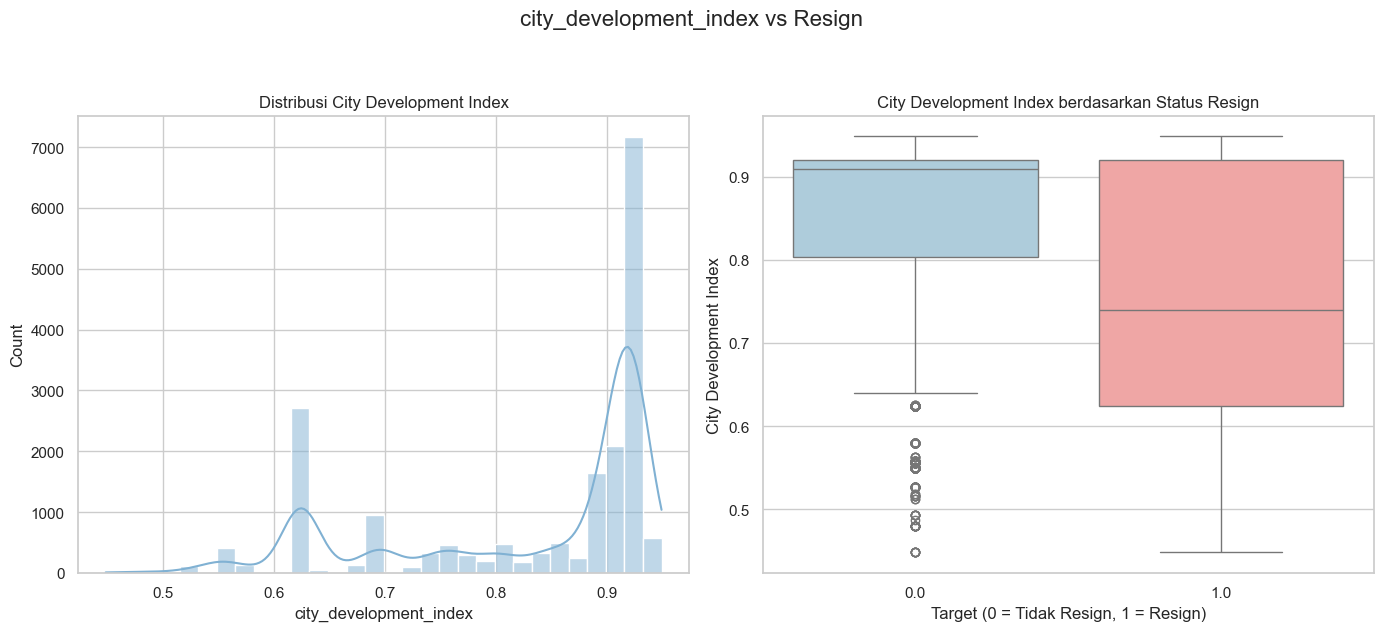

In [10]:
# TRAINING HOURS vs Target
# Set style visualisasi
sns.set(style="whitegrid")

# Buat visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("city_development_index vs Resign", fontsize=16, y=1.05)

# Histogram distribusi training_hours
sns.histplot(df['city_development_index'], bins=30, kde=True, ax=ax1, color='#80B1D3')
ax1.set_title("Distribusi City Development Index")
ax1.set_xlabel("city_development_index")

# Boxplot training_hours berdasarkan target
sns.boxplot(x='target', y='city_development_index', data=df, ax=ax2, palette=['#A6CEE3', '#FB9A99'])
ax2.set_title("City Development Index berdasarkan Status Resign")
ax2.set_xlabel("Target (0 = Tidak Resign, 1 = Resign)")
ax2.set_ylabel("City Development Index")

plt.tight_layout()
plt.show()

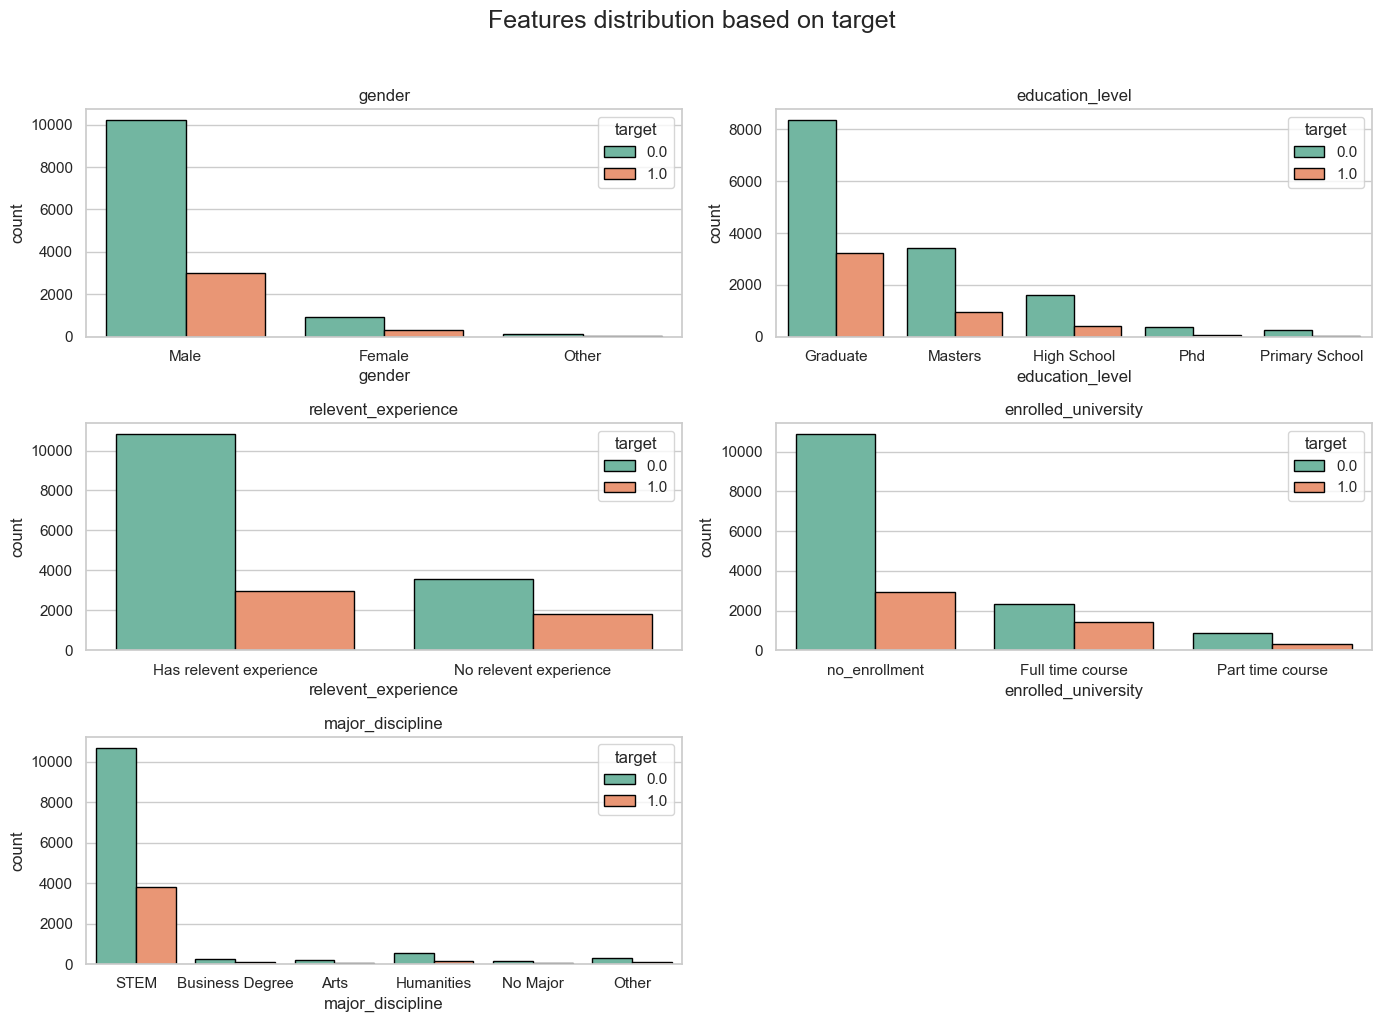

In [11]:
# Daftar fitur kategorikal yang ingin divisualisasikan
categorical_features = ['gender', 'education_level', 'relevent_experience', 'enrolled_university', 'major_discipline']

# Gaya visualisasi
sns.set(style="whitegrid")
n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols

# Ukuran dan layout subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axes = axes.flatten()

# Loop untuk plot tiap fitur
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='target', palette='Set2', edgecolor='black', ax=axes[i])
    axes[i].set_title(feature, fontsize=12)
    axes[i].tick_params(axis='x', rotation=0)  # label horizontal
    axes[i].legend(title='target', loc='upper right')

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
plt.suptitle("Features distribution based on target", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

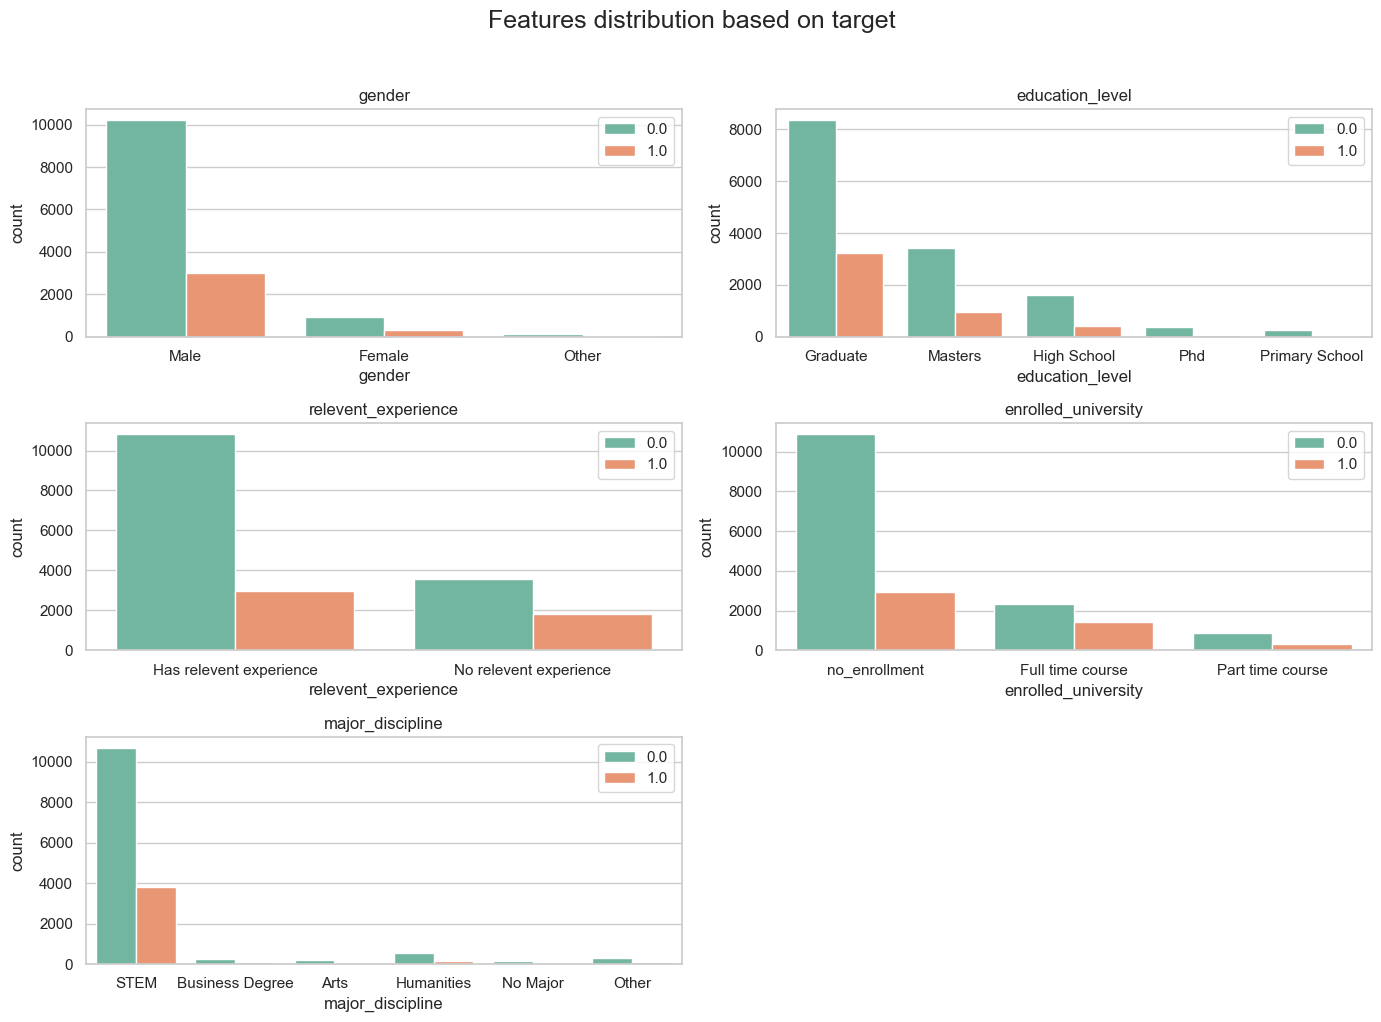

In [12]:
# Daftar fitur kategorikal yang ingin divisualisasikan
categorical_features = ['gender', 'education_level', 'relevent_experience', 'enrolled_university', 'major_discipline']

# Gaya visualisasi
sns.set(style="whitegrid")
n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols

# Ukuran dan layout subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axes = axes.flatten()

# Loop untuk plot tiap fitur
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='target', palette='Set2', edgecolor=None, ax=axes[i])  # edgecolor=None untuk menghilangkan border hitam
    axes[i].set_title(feature, fontsize=12)
    axes[i].tick_params(axis='x', rotation=0)  # label horizontal

    # Menghilangkan judul legenda (title='target')
    axes[i].legend(loc='upper right')

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
plt.suptitle("Features distribution based on target", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

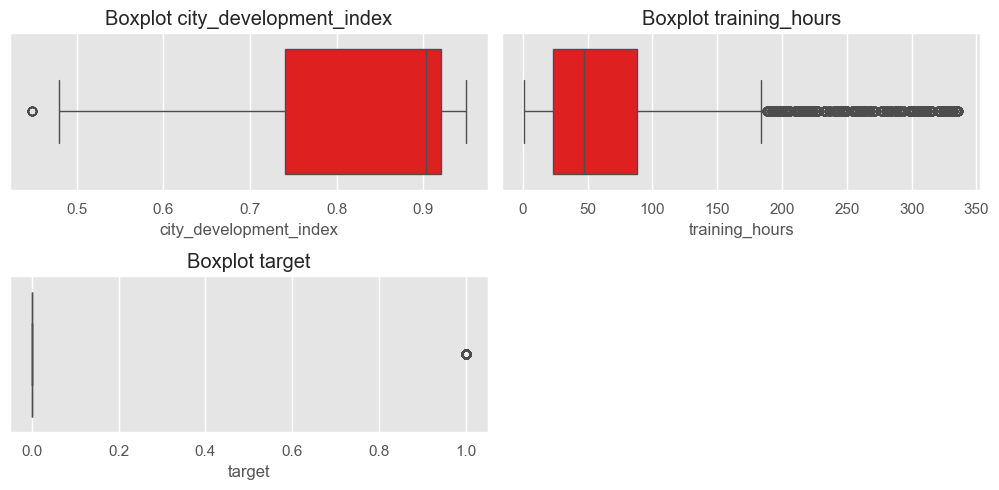

In [13]:
#Data Numerik Menggunakan Boxplot
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="red")
    axes[i].set_title(f'Boxplot {col}')

# Remove the empty subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

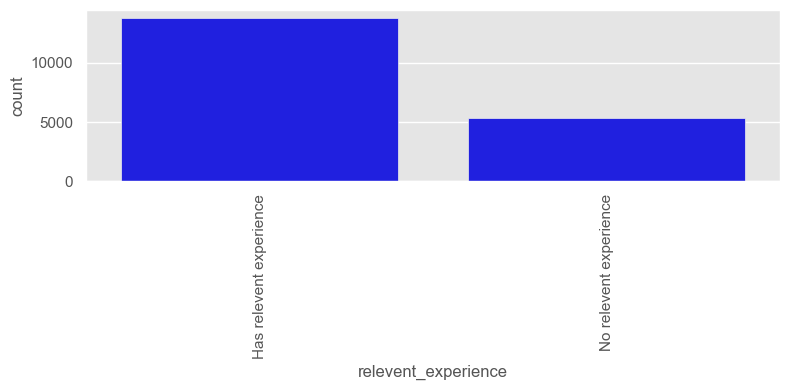

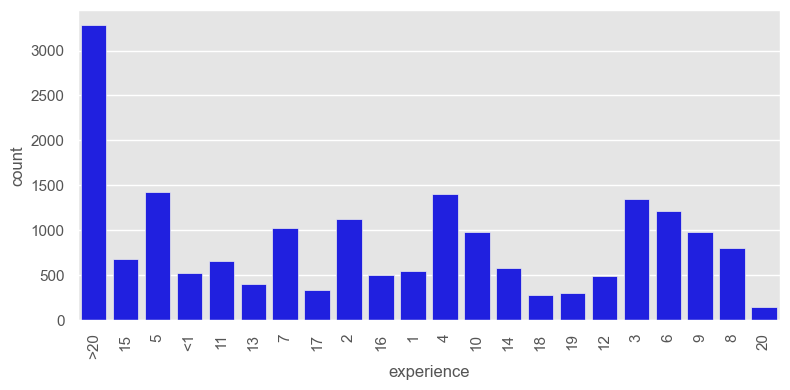

In [14]:
#Data Kategorik Menggunakan Barchart
cats = ["relevent_experience","experience"]

plt.figure(figsize=(15, 5))

for i in range(len(cats)):
    plt.figure(figsize=(8, 4))
    if df[cats[i]].nunique() > 10:
        top_category = df[cats[i]].value_counts().nlargest(10).index
        sns.countplot(x=df[cats[i]], data=df[df[cats[i]].isin(top_category)], color='blue')
    else:
        sns.countplot(x=df[cats[i]], data=df, color='blue')

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


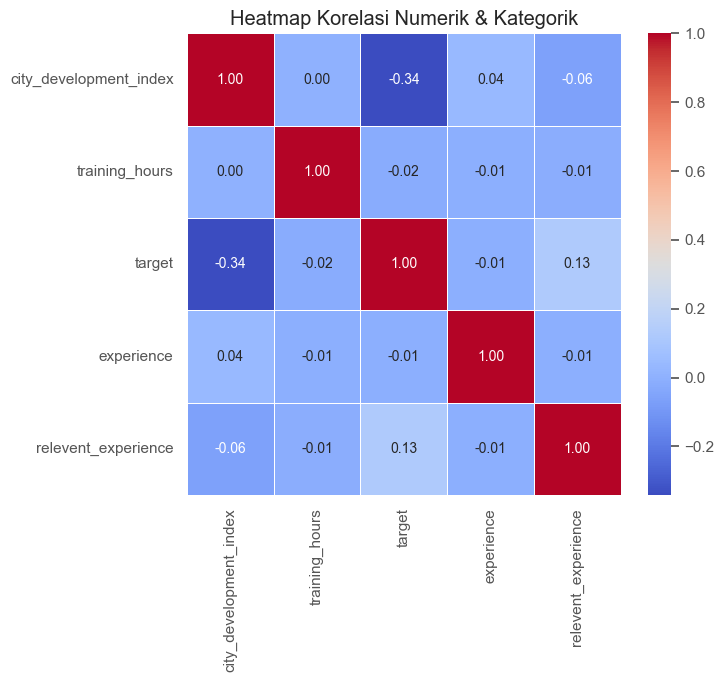

In [15]:
#Multivariate
# Konversi kategori ke numerik dengan encoding
df_encoded = df.copy()
categorical_columns = ["experience", "relevent_experience"]  # Ganti dengan kolom kategorik di dataset
df_encoded[categorical_columns] = df_encoded[categorical_columns].apply(lambda x: x.astype("category").cat.codes)

# Pilih hanya kolom yang sudah dikonversi
selected_columns = ["city_development_index", "training_hours", "target"] + categorical_columns
df_corr = df_encoded[selected_columns]

# Hitung korelasi
corr_matrix = df_corr.corr()

#Plot Heatmap Korelasi
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Numerik & Kategorik")
plt.show()

C:\Users\Yonatan\AppData\Local\Temp\ipykernel_24800\3484772794.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")


<Figure size 800x600 with 0 Axes>

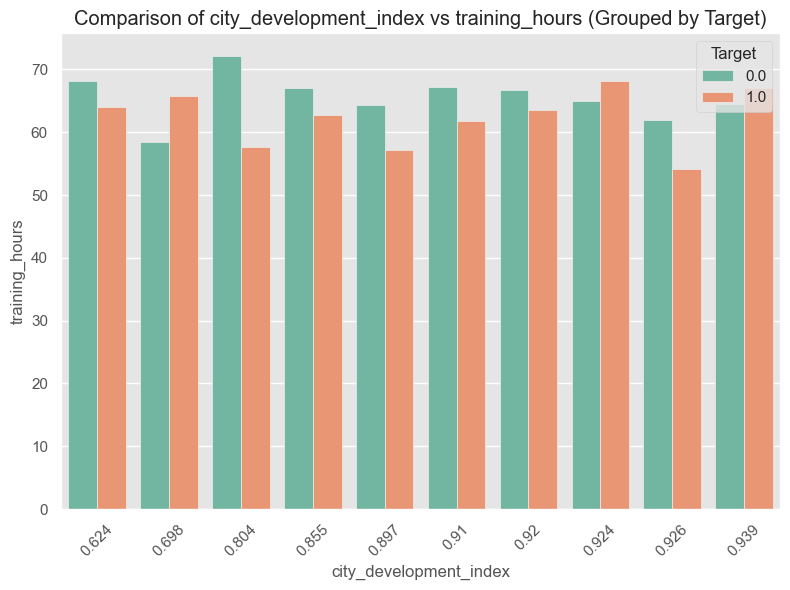

C:\Users\Yonatan\AppData\Local\Temp\ipykernel_24800\3484772794.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")


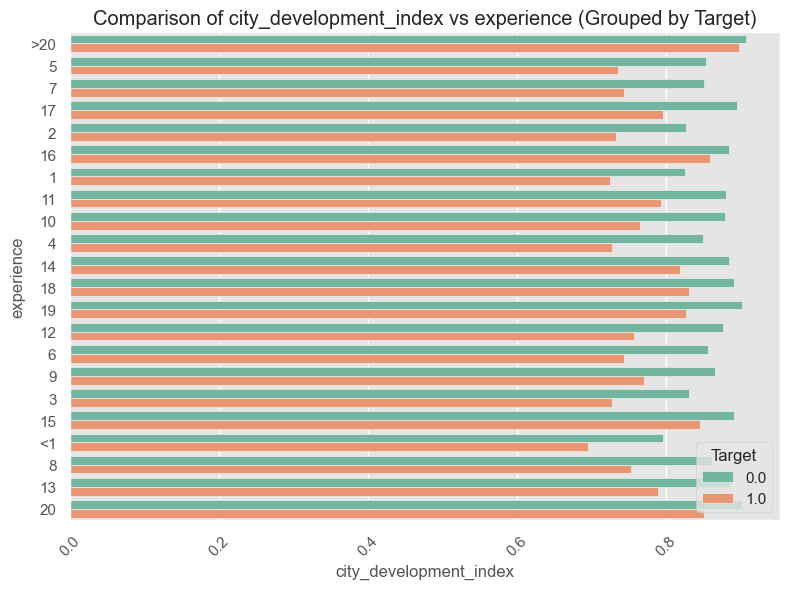

C:\Users\Yonatan\AppData\Local\Temp\ipykernel_24800\3484772794.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")


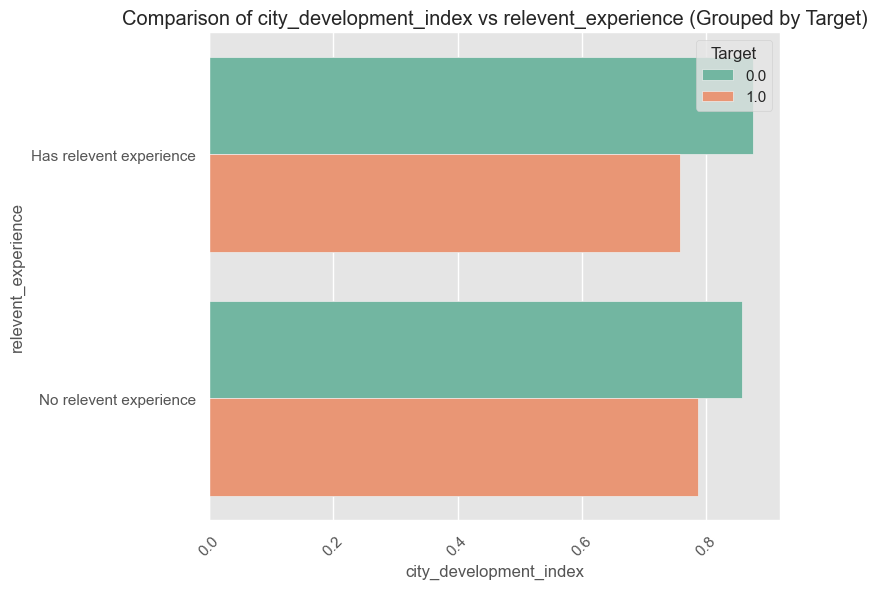

C:\Users\Yonatan\AppData\Local\Temp\ipykernel_24800\3484772794.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")


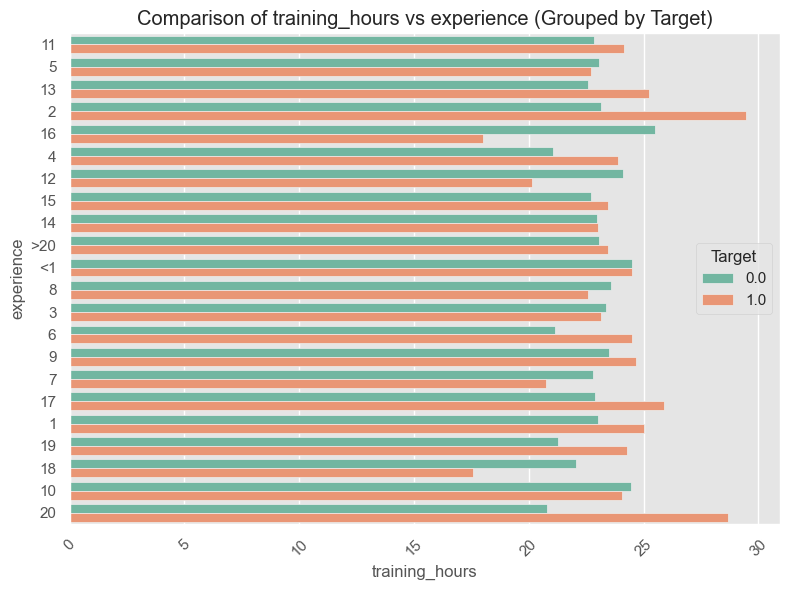

C:\Users\Yonatan\AppData\Local\Temp\ipykernel_24800\3484772794.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")


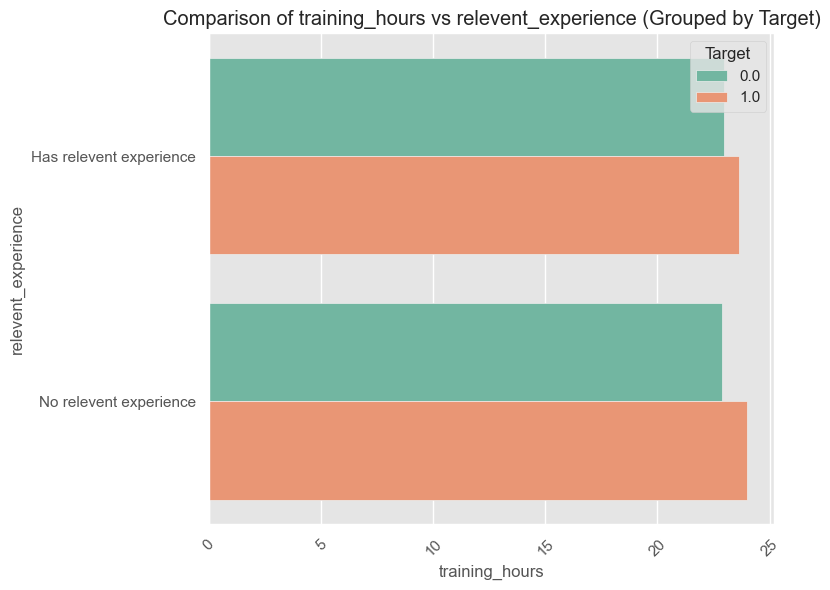

C:\Users\Yonatan\AppData\Local\Temp\ipykernel_24800\3484772794.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")


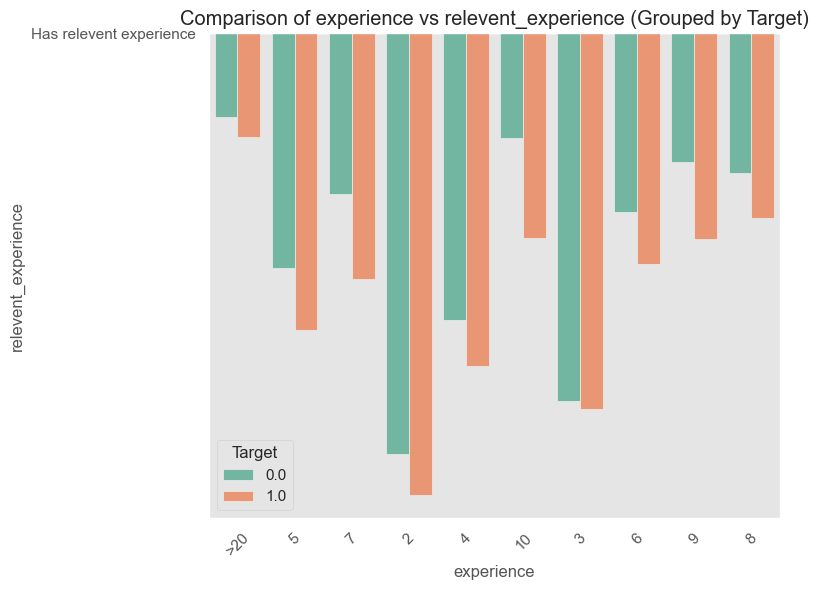

In [16]:
import itertools

# Konversi kategori ke numerik dengan encoding
df_encoded = df.copy()
categorical_columns = ["experience", "relevent_experience"]  # Ganti dengan kolom kategorik di dataset
df_encoded[categorical_columns] = df_encoded[categorical_columns].apply(lambda x: x.astype("category").cat.codes)

# Pilih hanya kolom yang sudah dikonversi
selected_columns = ["city_development_index", "training_hours"] + categorical_columns

# Buat kombinasi pasangan variabel untuk barplot
combinations = list(itertools.combinations(selected_columns, 2))

#Plot Barplot untuk tiap kombinasi variabel
plt.figure(figsize=(8, 6))

for var_x, var_y in combinations:
    plt.figure(figsize=(8, 6))

    # Ambil hanya 10 kategori terbanyak agar plot tidak penuh
    top_categories = df[var_x].value_counts().nlargest(10).index
    data = df[df[var_x].isin(top_categories)]

    #Barplot dengan Hue = Target
    sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")

    plt.xticks(rotation=45)
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.title(f"Comparison of {var_x} vs {var_y} (Grouped by Target)")
    plt.legend(title="Target")
    plt.tight_layout()
    plt.show()

In [17]:
#Isi missing values
for col in df.columns:
    if df[col].dtype == "object":  # Jika kategorikal
        df[col] = df[col].fillna(df[col].mode()[0])  # Isi dengan modus
    else:  # Jika numerik
        df[col] = df[col].fillna(df[col].median())  # Isi dengan median

#Cek jumlah missing values setelah cleaning
print("Missing values setelah cleaning:\n", df.isnull().sum())

Missing values setelah cleaning:
 city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
last_new_job              0
training_hours            0
target                    0
dtype: int64


In [18]:
# Pilih kolom tertentu yang akan dianalisis outliernya
num_cols = ["city_development_index"]

# Menghitung IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuat mask boolean untuk outlier
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)

# Hapus outlier dari DataFrame
df_cleaned = df[~outliers]

# Cek jumlah data setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {df_cleaned.shape[0]}")

Jumlah data setelah menghapus outlier: 19141


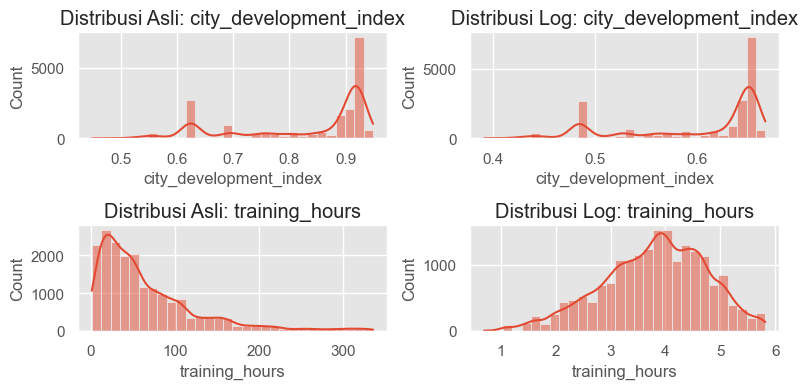

In [19]:
numerical_cols = ['city_development_index', 'training_hours']

df_log_transformed = df_cleaned.copy()
df_log_transformed[numerical_cols] = np.log1p(df_log_transformed[numerical_cols])  # log(1 + x) untuk menghindari log(0)
df_log_transformed.head()

# Plot distribusi sebelum dan sesudah transformasi
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(8, len(numerical_cols) * 2))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribusi Asli: {col}")

    sns.histplot(df_log_transformed[col], bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Distribusi Log: {col}")

plt.tight_layout()
plt.show()

In [20]:
df_log_transformed

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,city_103,0.652325,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,3.610918,1.0
1,city_40,0.574364,Male,No relevent experience,no_enrollment,Graduate,STEM,15,>4,3.871201,0.0
2,city_21,0.484892,Male,No relevent experience,Full time course,Graduate,STEM,5,0,4.430817,0.0
3,city_115,0.581657,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,0,3.970292,1.0
4,city_162,0.569283,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,4,2.197225,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.630207,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,1,3.761200,1.0
19154,city_103,0.652325,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,4,3.970292,1.0
19155,city_103,0.652325,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,4,3.806662,0.0
19156,city_65,0.588897,Male,Has relevent experience,no_enrollment,High School,STEM,<1,2,4.584967,0.0


In [21]:
df_feature_extraction = df_cleaned.copy()  # Buat salinan agar perubahan tidak memengaruhi df asli

In [22]:
# Mapping gaji realistis berdasarkan pendidikan
salary_mapping_realistic = {
    'Primary School': 3000000,
    'High School': 5000000,
    'Graduate': 8000000,
    'Masters': 12000000,
    'Phd': 16000000
}

# Fungsi estimasi gaji
def estimate_salary(row):
    base_salary = salary_mapping_realistic.get(row['education_level'], 0)
    experience = row['experience']

    if isinstance(experience, str):
        if experience == '<1':
            experience = 0.5
        elif experience == '>20':
            experience = 25
        else:
            try:
                experience = float(experience)
            except:
                return None

    if pd.isna(experience) or base_salary == 0:
        return None
    elif experience <= 1:
        return base_salary
    elif 2 <= experience <= 5:
        return base_salary * 1.10
    elif 6 <= experience <= 10:
        return base_salary * 1.20
    else:
        return base_salary * 1.30

# Terapkan ke dataset
df_feature_extraction["estimated_salary"] = df_feature_extraction.apply(estimate_salary, axis=1)

#Data setelah feature extraction
df_feature_extraction

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target,estimated_salary
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,36,1.0,10400000.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,>4,47,0.0,10400000.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,0,83,0.0,8800000.0
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,0,52,1.0,8000000.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,4,8,0.0,15600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,1,42,1.0,10400000.0
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,4,52,1.0,10400000.0
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,4,44,0.0,10400000.0
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,2,97,0.0,5000000.0


In [23]:
df_feature_extraction.to_csv("df_feature_extraction.csv", index=False)

#### Decision Tree

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, accuracy_score, roc_auc_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Simpan kolom 'training_hours' ke variabel terpisah
training_hours = df_feature_extraction['training_hours']

# Baru setelah itu hapus dari dataframe utama
df_feature_extraction.drop(columns=['training_hours'], inplace=True)


# 3. Pisahkan fitur dan target
X = df_feature_extraction.drop(columns='target')
y = df_feature_extraction['target']

# 4. Label Encoding untuk kolom kategorikal
cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col].astype(str))  # pastikan semua nilai string

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42, stratify=y)

# 6. Model training - Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. Prediksi dan Probabilitas
y_pred_train = model.predict(X_train)
y_proba_train = model.predict_proba(X_train)[:, 1]

y_pred_test = model.predict(X_test)
y_proba_test = model.predict_proba(X_test)[:, 1]

# 8. Evaluasi Training
print(" Training Evaluation Metrics")
print("-" * 40)
print("Recall   :", round(recall_score(y_train, y_pred_train), 4))
print("Accuracy :", round(accuracy_score(y_train, y_pred_train), 4))
print("ROC-AUC  :", round(roc_auc_score(y_train, y_proba_train), 4))
print()
print("Classification Report (Training):")
print(classification_report(y_train, y_pred_train))

# 9. Evaluasi Test
print("\n Test Evaluation Metrics")
print("-" * 40)
print("Recall   :", round(recall_score(y_test, y_pred_test), 4))
print("Accuracy :", round(accuracy_score(y_test, y_pred_test), 4))
print("ROC-AUC  :", round(roc_auc_score(y_test, y_proba_test), 4))
print()
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

 Training Evaluation Metrics
----------------------------------------
Recall   : 0.704
Accuracy : 0.8985
ROC-AUC  : 0.9646

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93     11931
         1.0       0.86      0.70      0.78      3956

    accuracy                           0.90     15887
   macro avg       0.89      0.83      0.85     15887
weighted avg       0.90      0.90      0.89     15887


 Test Evaluation Metrics
----------------------------------------
Recall   : 0.3716
Accuracy : 0.7234
ROC-AUC  : 0.6373

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      2444
         1.0       0.43      0.37      0.40       810

    accuracy                           0.72      3254
   macro avg       0.62      0.61      0.61      3254
weighted avg       0.71      0.72      0.72      3254



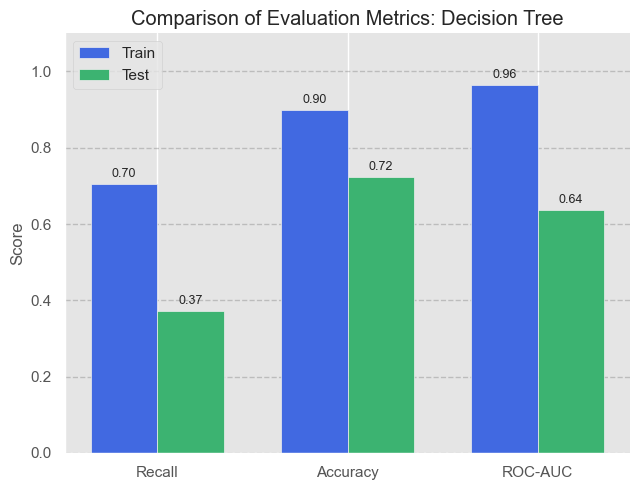

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Nilai metrik Decision Tree dari screenshot
metrics = ['Recall', 'Accuracy', 'ROC-AUC']
train_scores = [0.704, 0.8985, 0.9646]
test_scores = [0.3716, 0.7234, 0.6373]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(6.5, 5))

# Bar chart
rects1 = ax.bar(x - width/2, train_scores, width, label='Train', color='royalblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='mediumseagreen')

# Label angka
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

# Styling
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics: Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Grid garis bantu horizontal
ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.4)

# Bersihkan border atas & kanan
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

#### XGBoost

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from xgboost import XGBClassifier

In [27]:
xgb = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Prediksi dan Probabilitas
y_pred_train = xgb.predict(X_train)
y_proba_train = xgb.predict_proba(X_train)[:, 1]

y_pred_test = xgb.predict(X_test)
y_proba_test = xgb.predict_proba(X_test)[:, 1]

# 8. Evaluasi Training
print(" Training Evaluation Metrics")
print("-" * 40)
print("Recall   :", round(recall_score(y_train, y_pred_train), 4))
print("Accuracy :", round(accuracy_score(y_train, y_pred_train), 4))
print("ROC-AUC  :", round(roc_auc_score(y_train, y_proba_train), 4))
print()
print("Classification Report (Training):")
print(classification_report(y_train, y_pred_train))

# 9. Evaluasi Test
print("\n Test Evaluation Metrics")
print("-" * 40)
print("Recall   :", round(recall_score(y_test, y_pred_test), 4))
print("Accuracy :", round(accuracy_score(y_test, y_pred_test), 4))
print("ROC-AUC  :", round(roc_auc_score(y_test, y_proba_test), 4))
print()
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

 Training Evaluation Metrics
----------------------------------------
Recall   : 0.4927
Accuracy : 0.8111
ROC-AUC  : 0.8361

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88     11931
         1.0       0.66      0.49      0.57      3956

    accuracy                           0.81     15887
   macro avg       0.75      0.70      0.72     15887
weighted avg       0.80      0.81      0.80     15887


 Test Evaluation Metrics
----------------------------------------
Recall   : 0.3988
Accuracy : 0.7704
ROC-AUC  : 0.7616

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      2444
         1.0       0.55      0.40      0.46       810

    accuracy                           0.77      3254
   macro avg       0.69      0.65      0.66      3254
weighted avg       0.75      0.77      0.76      3254



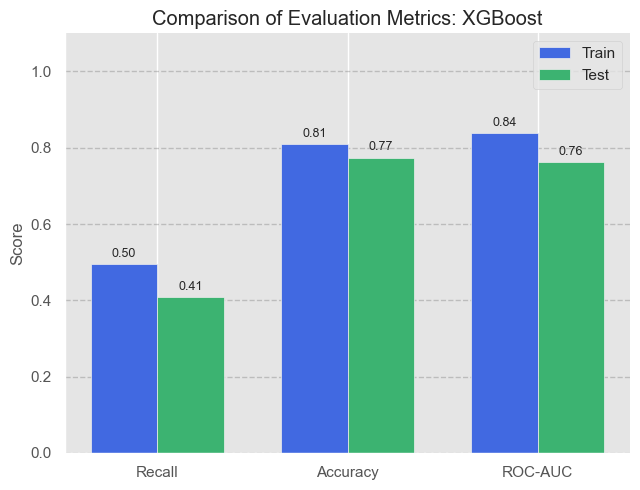

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Nilai metrik evaluasi XGBoost
metrics = ['Recall', 'Accuracy', 'ROC-AUC']
train_scores = [0.4952, 0.809, 0.8378]
test_scores = [0.4086, 0.7741, 0.7624]

x = np.arange(len(metrics))
width = 0.35

# Setup figure
fig, ax = plt.subplots(figsize=(6.5, 5))

# Bar chart
rects1 = ax.bar(x - width/2, train_scores, width, label='Train', color='royalblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='mediumseagreen')

# Tambahkan label angka di atas bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

# Konfigurasi sumbu, label, dan grid
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics: XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Tambahkan garis bantu horizontal seperti grafik sebelumnya
ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.4)

# Bersihkan border (optional)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Rapikan layout
plt.tight_layout()
plt.show()

In [29]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

xgb_grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)
xgb_grid.fit(X_train, y_train)

best_model = xgb_grid.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_proba_tuned = best_model.predict_proba(X_test)[:, 1]

# Prediksi dan Probabilitas
y_pred_tuned_train = best_model.predict(X_train)
y_proba_tuned_train = best_model.predict_proba(X_train)[:, 1]

y_pred_tuned_test = best_model.predict(X_test)
y_proba_tuned_test = best_model.predict_proba(X_test)[:, 1]

# 8. Evaluasi Training
print(" Training Evaluation Metrics")
print("-" * 40)
print("Recall   :", round(recall_score(y_train, y_pred_tuned_train), 4))
print("Accuracy :", round(accuracy_score(y_train, y_pred_tuned_train), 4))
print("ROC-AUC  :", round(roc_auc_score(y_train, y_proba_tuned_train), 4))
print()
print("Classification Report (Training):")
print(classification_report(y_train, y_pred_tuned_train))

# 9. Evaluasi Test
print("\n Test Evaluation Metrics")
print("-" * 40)
print("Recall   :", round(recall_score(y_test, y_pred_tuned_test), 4))
print("Accuracy :", round(accuracy_score(y_test, y_pred_tuned_test), 4))
print("ROC-AUC  :", round(roc_auc_score(y_test, y_proba_tuned_test), 4))
print()
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_tuned_test))

 Training Evaluation Metrics
----------------------------------------
Recall   : 0.4055
Accuracy : 0.7833
ROC-AUC  : 0.7687

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     11931
         1.0       0.60      0.41      0.48      3956

    accuracy                           0.78     15887
   macro avg       0.71      0.66      0.67     15887
weighted avg       0.77      0.78      0.77     15887


 Test Evaluation Metrics
----------------------------------------
Recall   : 0.4012
Accuracy : 0.7864
ROC-AUC  : 0.7658

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.87      2444
         1.0       0.61      0.40      0.48       810

    accuracy                           0.79      3254
   macro avg       0.71      0.66      0.67      3254
weighted avg       0.77      0.79      0.77      3254



#### Logistic Regression

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, roc_auc_score, classification_report

# 1. Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Logistic Regression tanpa hypertuning
logreg_default = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg_default.fit(X_train_scaled, y_train)

# 3. Evaluasi di training set
y_pred_train = logreg_default.predict(X_train_scaled)
y_proba_train = logreg_default.predict_proba(X_train_scaled)[:, 1]

print("📊 Evaluasi Training Set (Tanpa Hypertuning)")
print("--------------------------------------------")
print(f"Recall     : {recall_score(y_train, y_pred_train):.4f}")
print(f"Accuracy   : {accuracy_score(y_train, y_pred_train):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_train, y_proba_train):.4f}")
print("\nClassification Report (Training):")
print(classification_report(y_train, y_pred_train))

# 4. Evaluasi di test set
y_pred_test = logreg_default.predict(X_test_scaled)
y_proba_test = logreg_default.predict_proba(X_test_scaled)[:, 1]

print("\n📊 Evaluasi Test Set (Tanpa Hypertuning)")
print("-----------------------------------------")
print(f"Recall     : {recall_score(y_test, y_pred_test):.4f}")
print(f"Accuracy   : {accuracy_score(y_test, y_pred_test):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_test, y_proba_test):.4f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

📊 Evaluasi Training Set (Tanpa Hypertuning)
--------------------------------------------
Recall     : 0.6385
Accuracy   : 0.7118
ROC-AUC    : 0.7358

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.86      0.74      0.79     11931
         1.0       0.45      0.64      0.52      3956

    accuracy                           0.71     15887
   macro avg       0.65      0.69      0.66     15887
weighted avg       0.76      0.71      0.73     15887


📊 Evaluasi Test Set (Tanpa Hypertuning)
-----------------------------------------
Recall     : 0.6296
Accuracy   : 0.7068
ROC-AUC    : 0.7371

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79      2444
         1.0       0.44      0.63      0.52       810

    accuracy                           0.71      3254
   macro avg       0.65      0.68      0.65      3254
weighted avg       0.75      0.71      0.72

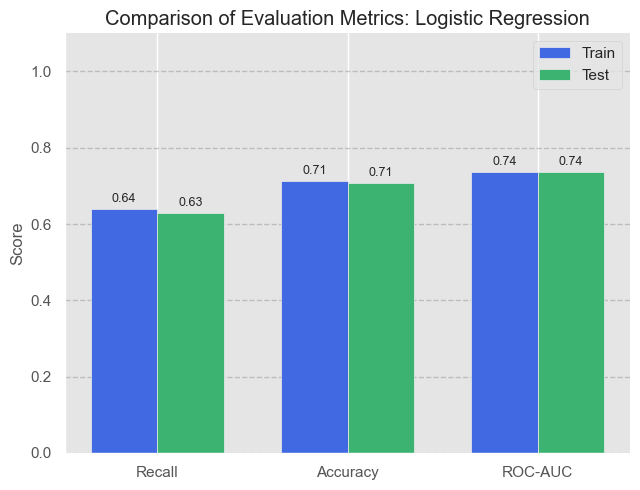

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Nilai dari evaluasi
metrics = ['Recall', 'Accuracy', 'ROC-AUC']
train_scores = [0.6385, 0.7118, 0.7358]
test_scores = [0.6296, 0.7068, 0.7371]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(6.5, 5))

# Bar chart
rects1 = ax.bar(x - width/2, train_scores, width, label='Train', color='royalblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='mediumseagreen')

# Label angka di atas bar (dua angka di belakang koma)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

# Styling
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics: Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Tambahkan grid horizontal
ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.4)

# Hilangkan border atas dan kanan
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, roc_auc_score, classification_report

# 4. Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Logistic Regression dengan class_weight='balanced'
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# 6. Hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

# 7. Evaluasi di training set
y_pred_train = best_model.predict(X_train_scaled)
y_proba_train = best_model.predict_proba(X_train_scaled)[:, 1]

print("📊 Evaluasi Training Set")
print("--------------------------")
print(f"Recall     : {recall_score(y_train, y_pred_train):.4f}")
print(f"Accuracy   : {accuracy_score(y_train, y_pred_train):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_train, y_proba_train):.4f}")
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

# 8. Evaluasi di test set
y_pred_test = best_model.predict(X_test_scaled)
y_proba_test = best_model.predict_proba(X_test_scaled)[:, 1]

print("\n📊 Evaluasi Test Set")
print("------------------------")
print(f"Recall     : {recall_score(y_test, y_pred_test):.4f}")
print(f"Accuracy   : {accuracy_score(y_test, y_pred_test):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_test, y_proba_test):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

📊 Evaluasi Training Set
--------------------------
Recall     : 0.6365
Accuracy   : 0.7123
ROC-AUC    : 0.7356

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.74      0.79     11931
         1.0       0.45      0.64      0.52      3956

    accuracy                           0.71     15887
   macro avg       0.65      0.69      0.66     15887
weighted avg       0.76      0.71      0.73     15887


📊 Evaluasi Test Set
------------------------
Recall     : 0.6296
Accuracy   : 0.7081
ROC-AUC    : 0.7370

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79      2444
         1.0       0.44      0.63      0.52       810

    accuracy                           0.71      3254
   macro avg       0.65      0.68      0.65      3254
weighted avg       0.75      0.71      0.72      3254



📊 Evaluasi Training Set (SMOTE + Hypertuning)
------------------------------------------------
Recall     : 0.6370
Accuracy   : 0.7123
ROC-AUC    : 0.7358

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.86      0.74      0.79     11931
         1.0       0.45      0.64      0.52      3956

    accuracy                           0.71     15887
   macro avg       0.65      0.69      0.66     15887
weighted avg       0.76      0.71      0.73     15887


📌 Threshold untuk Recall ~0.70
----------------------------------
Threshold : 0.45
Recall    : 0.7086
Precision : 0.4091
Accuracy  : 0.6727


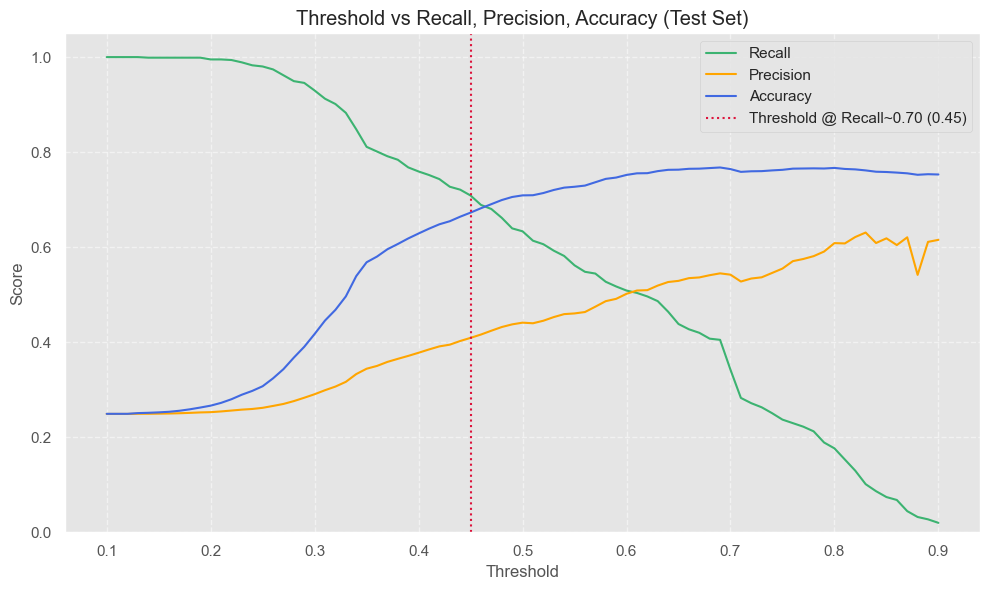

,Threshold,Recall,Accuracy,Precision
0,0.10,1.000000,0.249232,0.249001
1,0.20,0.995062,0.266441,0.252744
2,0.30,0.929630,0.417333,0.290509
3,0.40,0.759259,0.628765,0.377764
4,0.45,0.708642,0.672711,0.409123
5,0.50,0.633333,0.708974,0.441101
6,0.60,0.508642,0.751998,0.501827
7,0.70,0.341975,0.764290,0.542074
8,0.80,0.176543,0.766749,0.608511
9,0.90,0.019753,0.752919,0.615385


In [33]:
# Install SMOTE jika belum
# !pip install imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# 1. Pipeline: Scaling + SMOTE + Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# 2. Hyperparameter grid
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs']
}

# 3. Training & hypertuning
grid_search_logreg = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

# 4. Evaluasi Training Set
y_pred_train = grid_search_logreg.predict(X_train)
y_proba_train = grid_search_logreg.predict_proba(X_train)[:, 1]

print("📊 Evaluasi Training Set (SMOTE + Hypertuning)")
print("------------------------------------------------")
print(f"Recall     : {recall_score(y_train, y_pred_train):.4f}")
print(f"Accuracy   : {accuracy_score(y_train, y_pred_train):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_train, y_proba_train):.4f}")
print("\nClassification Report (Training):")
print(classification_report(y_train, y_pred_train))

# 5. Threshold Tuning: Recall vs. Precision vs. Accuracy
y_proba_test = grid_search_logreg.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.1, 0.91, 0.01)
recalls, precisions, accuracies = [], [], []

for t in thresholds:
    y_pred_thresh = (y_proba_test >= t).astype(int)
    recalls.append(recall_score(y_test, y_pred_thresh))
    precisions.append(precision_score(y_test, y_pred_thresh))
    accuracies.append(accuracy_score(y_test, y_pred_thresh))

# 6. Cari threshold terdekat dengan recall = 0.70
target_recall = 0.70
closest_idx = np.argmin(np.abs(np.array(recalls) - target_recall))
threshold_at_70_recall = thresholds[closest_idx]
precision_at_70 = precisions[closest_idx]
accuracy_at_70 = accuracies[closest_idx]

# Print hasil
print("\n📌 Threshold untuk Recall ~0.70")
print("----------------------------------")
print(f"Threshold : {threshold_at_70_recall:.2f}")
print(f"Recall    : {recalls[closest_idx]:.4f}")
print(f"Precision : {precision_at_70:.4f}")
print(f"Accuracy  : {accuracy_at_70:.4f}")

# 7. Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label="Recall", color="mediumseagreen")
plt.plot(thresholds, precisions, label="Precision", color="orange")
plt.plot(thresholds, accuracies, label="Accuracy", color="royalblue")

plt.axvline(threshold_at_70_recall, color='crimson', linestyle=':', label=f'Threshold @ Recall~0.70 ({threshold_at_70_recall:.2f})')

plt.title("Threshold vs Recall, Precision, Accuracy (Test Set)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 8. Tabel metrik untuk threshold kelipatan 0.1 dan threshold optimal (0.45)
kelipatan_thresholds = np.round(np.arange(0.1, 1.0, 0.1), 2)
metrics_data = []

for t in kelipatan_thresholds:
    y_pred_t = (y_proba_test >= t).astype(int)
    metrics_data.append([
        t,
        recall_score(y_test, y_pred_t),
        accuracy_score(y_test, y_pred_t),
        precision_score(y_test, y_pred_t)
    ])

# Tambahkan threshold optimal (misal 0.45)
threshold_opt = 0.45
y_pred_opt = (y_proba_test >= threshold_opt).astype(int)
metrics_data.append([
    threshold_opt,
    recall_score(y_test, y_pred_opt),
    accuracy_score(y_test, y_pred_opt),
    precision_score(y_test, y_pred_opt)
])

# Buat DataFrame dan urutkan
df_threshold_metrics = pd.DataFrame(metrics_data, columns=["Threshold", "Recall", "Accuracy", "Precision"])
df_threshold_metrics = df_threshold_metrics.sort_values("Threshold").reset_index(drop=True)

# Tampilkan tabel
display(df_threshold_metrics)

📊 Evaluasi Training Set (SMOTE + Hypertuning)
------------------------------------------------
Recall     : 0.6370
Accuracy   : 0.7123
ROC-AUC    : 0.7358

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.86      0.74      0.79     11931
         1.0       0.45      0.64      0.52      3956

    accuracy                           0.71     15887
   macro avg       0.65      0.69      0.66     15887
weighted avg       0.76      0.71      0.73     15887


📌 Threshold untuk Recall ~0.70
----------------------------------
Threshold : 0.45
Recall    : 0.7086
Precision : 0.4091
Accuracy  : 0.6727
F1 Score  : 0.5188


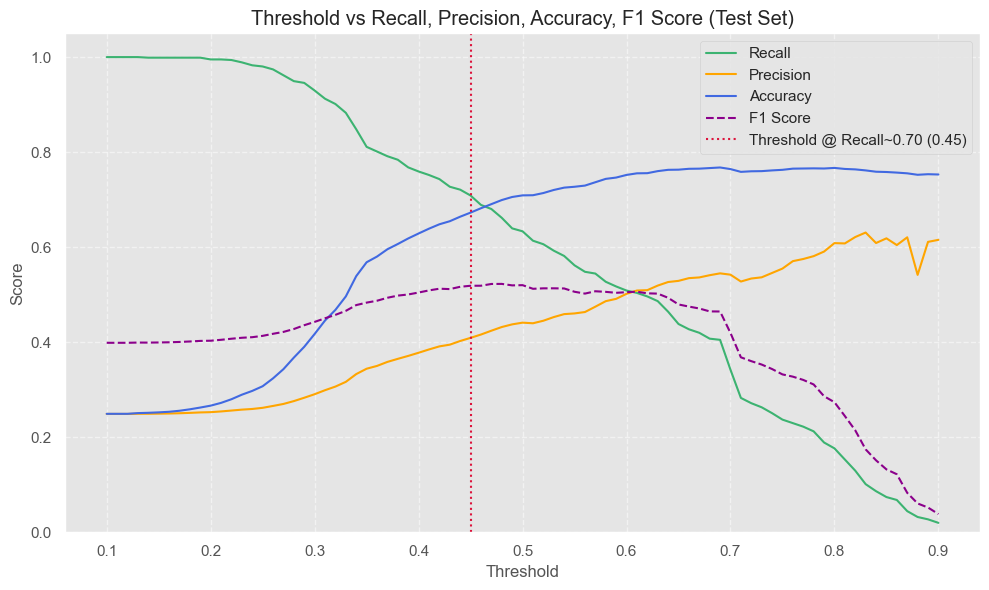

,Threshold,Recall,Accuracy,Precision,F1 Score
0,0.10,1.000000,0.249232,0.249001,0.398720
1,0.20,0.995062,0.266441,0.252744,0.403101
2,0.30,0.929630,0.417333,0.290509,0.442681
3,0.40,0.759259,0.628765,0.377764,0.504512
4,0.45,0.708642,0.672711,0.409123,0.518753
5,0.50,0.633333,0.708974,0.441101,0.520020
6,0.60,0.508642,0.751998,0.501827,0.505212
7,0.70,0.341975,0.764290,0.542074,0.419379
8,0.80,0.176543,0.766749,0.608511,0.273684
9,0.90,0.019753,0.752919,0.615385,0.038278


In [34]:
# Install SMOTE jika belum
# !pip install imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    recall_score, precision_score, accuracy_score, roc_auc_score,
    classification_report, f1_score
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# 1. Pipeline: Scaling + SMOTE + Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# 2. Hyperparameter grid
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs']
}

# 3. Training & hypertuning
grid_search_logreg = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

# 4. Evaluasi Training Set
y_pred_train = grid_search_logreg.predict(X_train)
y_proba_train = grid_search_logreg.predict_proba(X_train)[:, 1]

print("📊 Evaluasi Training Set (SMOTE + Hypertuning)")
print("------------------------------------------------")
print(f"Recall     : {recall_score(y_train, y_pred_train):.4f}")
print(f"Accuracy   : {accuracy_score(y_train, y_pred_train):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_train, y_proba_train):.4f}")
print("\nClassification Report (Training):")
print(classification_report(y_train, y_pred_train))

# 5. Threshold Tuning: Recall vs. Precision vs. Accuracy vs. F1
y_proba_test = grid_search_logreg.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.1, 0.91, 0.01)
recalls, precisions, accuracies, f1_scores = [], [], [], []

for t in thresholds:
    y_pred_thresh = (y_proba_test >= t).astype(int)
    recalls.append(recall_score(y_test, y_pred_thresh))
    precisions.append(precision_score(y_test, y_pred_thresh))
    accuracies.append(accuracy_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# 6. Cari threshold terdekat dengan recall = 0.70
target_recall = 0.70
closest_idx = np.argmin(np.abs(np.array(recalls) - target_recall))
threshold_at_70_recall = thresholds[closest_idx]
precision_at_70 = precisions[closest_idx]
accuracy_at_70 = accuracies[closest_idx]
f1_at_70 = f1_scores[closest_idx]

# Print hasil
print("\n📌 Threshold untuk Recall ~0.70")
print("----------------------------------")
print(f"Threshold : {threshold_at_70_recall:.2f}")
print(f"Recall    : {recalls[closest_idx]:.4f}")
print(f"Precision : {precision_at_70:.4f}")
print(f"Accuracy  : {accuracy_at_70:.4f}")
print(f"F1 Score  : {f1_at_70:.4f}")

# 7. Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label="Recall", color="mediumseagreen")
plt.plot(thresholds, precisions, label="Precision", color="orange")
plt.plot(thresholds, accuracies, label="Accuracy", color="royalblue")
plt.plot(thresholds, f1_scores, label="F1 Score", color="darkmagenta", linestyle='--')

plt.axvline(threshold_at_70_recall, color='crimson', linestyle=':', label=f'Threshold @ Recall~0.70 ({threshold_at_70_recall:.2f})')

plt.title("Threshold vs Recall, Precision, Accuracy, F1 Score (Test Set)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 8. Tabel metrik untuk threshold kelipatan 0.1 dan threshold optimal (0.45)
kelipatan_thresholds = np.round(np.arange(0.1, 1.0, 0.1), 2)
metrics_data = []

for t in kelipatan_thresholds:
    y_pred_t = (y_proba_test >= t).astype(int)
    metrics_data.append([
        t,
        recall_score(y_test, y_pred_t),
        accuracy_score(y_test, y_pred_t),
        precision_score(y_test, y_pred_t),
        f1_score(y_test, y_pred_t)
    ])

# Tambahkan threshold optimal (misal 0.45)
threshold_opt = 0.45
y_pred_opt = (y_proba_test >= threshold_opt).astype(int)
metrics_data.append([
    threshold_opt,
    recall_score(y_test, y_pred_opt),
    accuracy_score(y_test, y_pred_opt),
    precision_score(y_test, y_pred_opt),
    f1_score(y_test, y_pred_opt)
])

# Buat DataFrame dan urutkan
df_threshold_metrics = pd.DataFrame(metrics_data, columns=["Threshold", "Recall", "Accuracy", "Precision", "F1 Score"])
df_threshold_metrics = df_threshold_metrics.sort_values("Threshold").reset_index(drop=True)

# Tampilkan tabel
display(df_threshold_metrics)


#### Random Forest

In [35]:
X_train

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,estimated_salary
10291,48,0.910,1,1,0,0,5,14,0,8800000.0
13381,2,0.887,1,0,1,0,5,6,1,10400000.0
575,81,0.890,1,0,2,0,5,19,1,9600000.0
5238,64,0.624,1,0,0,0,5,13,1,8800000.0
12463,5,0.920,1,0,2,0,5,1,1,9600000.0
...,...,...,...,...,...,...,...,...,...,...
9334,30,0.897,1,0,2,2,5,21,1,15600000.0
6017,64,0.624,1,1,0,1,5,14,0,5500000.0
4731,13,0.926,1,0,2,2,5,2,4,15600000.0
12364,64,0.624,1,0,0,2,5,15,0,13200000.0


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    # Prediksi label dan probabilitas
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]
    y_pred_train = model.predict(X_train)
    y_proba_train = model.predict_proba(X_train)[:, 1]

    # 📊 Evaluasi TRAINING
    print("📊 Evaluasi Training Set")
    print("--------------------------------------------")
    print(f"Recall     : {recall_score(y_train, y_pred_train):.4f}")
    print(f"Accuracy   : {accuracy_score(y_train, y_pred_train):.4f}")
    print(f"ROC-AUC    : {roc_auc_score(y_train, y_proba_train):.4f}")
    print("\nClassification Report (Training):")
    print(classification_report(y_train, y_pred_train))

    # 📊 Evaluasi TEST
    print("\n📊 Evaluasi Test Set")
    print("--------------------------------------------")
    print(f"Recall     : {recall_score(y_test, y_pred_test):.4f}")
    print(f"Accuracy   : {accuracy_score(y_test, y_pred_test):.4f}")
    print(f"ROC-AUC    : {roc_auc_score(y_test, y_proba_test):.4f}")
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_pred_test))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

📊 Evaluasi Training Set
--------------------------------------------
Recall     : 0.7558
Accuracy   : 0.8985
ROC-AUC    : 0.9559

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     11931
         1.0       0.82      0.76      0.79      3956

    accuracy                           0.90     15887
   macro avg       0.87      0.85      0.86     15887
weighted avg       0.90      0.90      0.90     15887


📊 Evaluasi Test Set
--------------------------------------------
Recall     : 0.3877
Accuracy   : 0.7560
ROC-AUC    : 0.7162

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      2444
         1.0       0.51      0.39      0.44       810

    accuracy                           0.76      3254
   macro avg       0.66      0.63      0.64      3254
weighted avg       0.74      0.76      0.74      3254



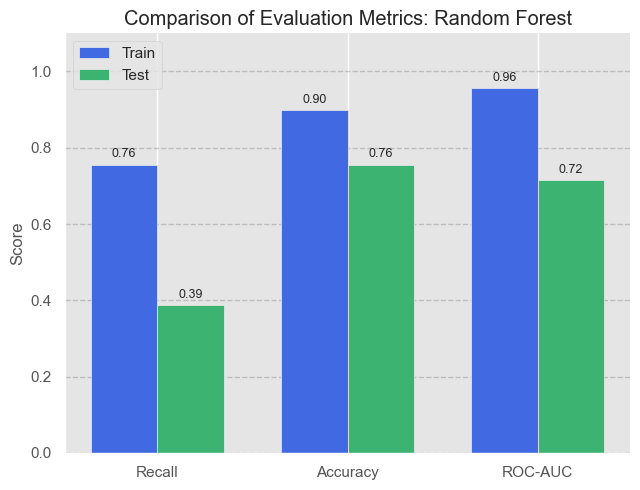

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil metrik dari gambar evaluasi kamu
metrics = ['Recall', 'Accuracy', 'ROC-AUC']
train_scores = [0.7558, 0.8985, 0.9559]
test_scores = [0.3877, 0.7560, 0.7162]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(6.5, 5))

# Bar chart
rects1 = ax.bar(x - width/2, train_scores, width, label='Train', color='royalblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='mediumseagreen')

# Label angka di atas bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  # tampilkan hingga 4 digit biar mirip outputmu
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

# Styling sumbu dan grid
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics: Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Garis bantu horizontal
ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.4)

# Hilangkan border atas & kanan
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_base = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_base,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=1,
                           scoring='f1_macro')

# Fit ke data training
grid_search.fit(X_train, y_train.values.ravel())


Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro', verbose=1)

In [40]:
best_rf = grid_search.best_estimator_
eval_classification(best_rf)

📊 Evaluasi Training Set
--------------------------------------------
Recall     : 0.4431
Accuracy   : 0.8013
ROC-AUC    : 0.8241

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87     11931
         1.0       0.65      0.44      0.53      3956

    accuracy                           0.80     15887
   macro avg       0.74      0.68      0.70     15887
weighted avg       0.79      0.80      0.79     15887


📊 Evaluasi Test Set
--------------------------------------------
Recall     : 0.4025
Accuracy   : 0.7840
ROC-AUC    : 0.7693

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      2444
         1.0       0.60      0.40      0.48       810

    accuracy                           0.78      3254
   macro avg       0.71      0.66      0.67      3254
weighted avg       0.77      0.78      0.77      3254



In [41]:
# Menghitung threshold otomatis berdasarkan quantile
th_segmen = training_hours.copy()

q1 = th_segmen.quantile(0.25)
q2 = th_segmen.quantile(0.50)
q3 = th_segmen.quantile(0.75)

def training_class(hours):
    if hours <= q1:
        return 'Low'
    elif hours <= q2:
        return 'Medium'
    else:
        return 'High'

training_hours_group = th_segmen.apply(training_class)
print('Kuartil 1',q1)
print('Kuartil 2',q2)
print('Kuartil 3',q3)
training_hours_group

Kuartil 1 23.0
Kuartil 2 47.0
Kuartil 3 88.0


0        Medium
1        Medium
2          High
3          High
4           Low
          ...  
19153    Medium
19154      High
19155    Medium
19156      High
19157      High
Name: training_hours, Length: 19141, dtype: object

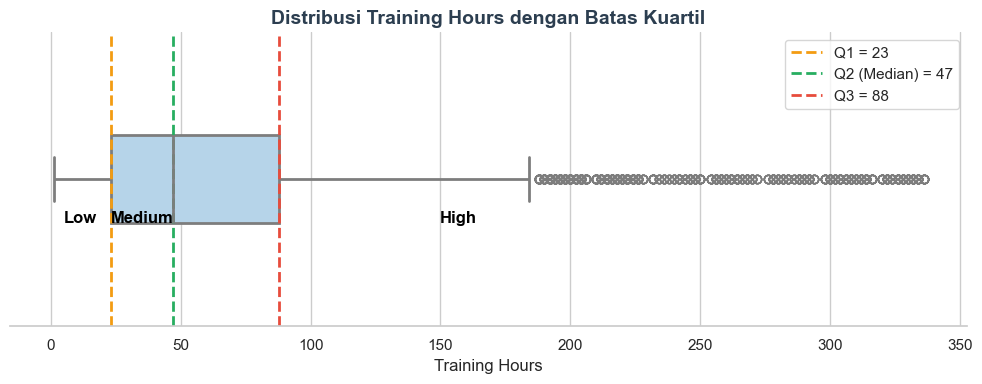

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set gaya visual
sns.set(style='whitegrid')

plt.figure(figsize=(10, 4))

# Boxplot dengan warna modern
sns.boxplot(x=training_hours, color='#AED6F1', linewidth=2, width=0.3, fliersize=6)

# Tambahkan garis kuartil (dengan warna khas)
plt.axvline(q1, color='#F39C12', linestyle='--', linewidth=2, label=f'Q1 = {q1:.0f}')
plt.axvline(q2, color='#27AE60', linestyle='--', linewidth=2, label=f'Q2 (Median) = {q2:.0f}')
plt.axvline(q3, color='#E74C3C', linestyle='--', linewidth=2, label=f'Q3 = {q3:.0f}')

# Tambahkan label segmentasi di atas boxplot
plt.text(q1 / 2, 0.15, 'Low', ha='center', fontsize=12, weight='bold', color='black')
plt.text((q1 + q2) / 2, 0.15, 'Medium', ha='center', fontsize=12, weight='bold', color='black')
plt.text((q2 + q3 + training_hours.max()) / 3, 0.15, 'High', ha='center', fontsize=12, weight='bold', color='black')

# Estetik tambahan
plt.title('Distribusi Training Hours dengan Batas Kuartil', fontsize=14, weight='bold', color='#2C3E50')
plt.xlabel('Training Hours', fontsize=12)
plt.yticks([])
plt.legend(loc='upper right', frameon=True)
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()

In [43]:
model_optimum = grid_search_logreg.best_estimator_
print(model_optimum)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('clf',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='liblinear'))])


In [44]:
# Ambil scaler dari pipeline
scaler = model_optimum.named_steps['scaler']

# Transform X_train secara manual untuk SHAP (harus di-scale)
X_train_scaled = scaler.transform(X_train)

In [45]:
import shap

# Ambil model Logistic Regression dari pipeline
logreg_model = model_optimum.named_steps['clf']

# Buat SHAP explainer (Linear karena Logistic Regression)
explainer = shap.Explainer(logreg_model, X_train_scaled)

# Hitung SHAP values
shap_values = explainer(X_train_scaled)

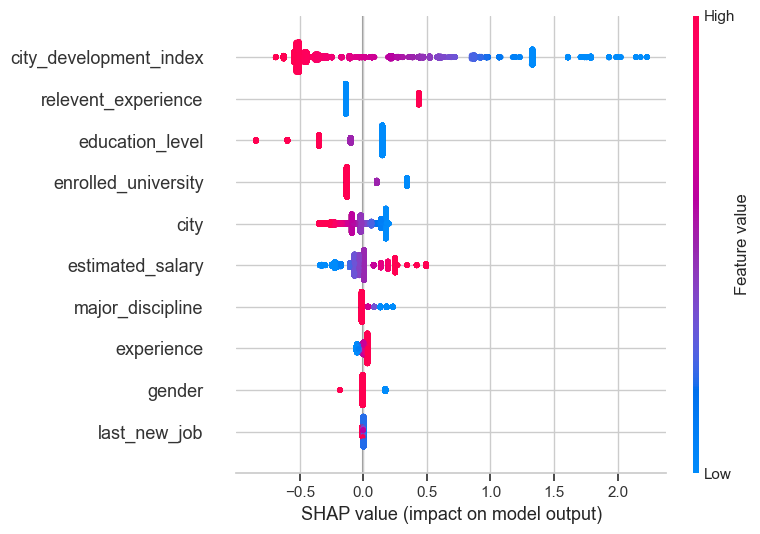

In [46]:
# Plot summary SHAP
shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train.columns)

In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
import pandas as pd

# 1. Prediksi label dari model terbaik (model_optimum_logreg)
y_pred_test = model_optimum.predict(X_test)

# 2. Gabungkan hasil prediksi dengan data asli untuk analisis fairness
fair_df = pd.DataFrame({
    'Gender': X_test['gender'],     # ← Ganti jika ingin analisis berdasarkan fitur lain, misal 'age_group'
    'True_Label': y_test,
    'Pred_Label': y_pred_test
})

# 3. Hitung metrik evaluasi per grup
fairness_result = {}

for g in fair_df['Gender'].unique():
    sub = fair_df[fair_df['Gender'] == g]

    fairness_result[g] = {
        'Accuracy': accuracy_score(sub['True_Label'], sub['Pred_Label']),
        'Recall': recall_score(sub['True_Label'], sub['Pred_Label']),
        'Precision': precision_score(sub['True_Label'], sub['Pred_Label'])
    }

# 4. Tampilkan hasil sebagai DataFrame
fairness_df = pd.DataFrame(fairness_result).T
display(fairness_df)

,Accuracy,Recall,Precision
1,0.714523,0.634794,0.450094
0,0.631336,0.640000,0.340426
2,0.714286,0.428571,0.428571


#### **Fairness Analysis**

In [48]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Fungsi Demographic Parity
def demographic_parity(y_pred, protected_attribute):
    result = {}
    for group in np.unique(protected_attribute):
        idx = protected_attribute == group
        result[group] = np.mean(y_pred[idx])
    return result

# Fungsi Equalized Odds
def equalized_odds(y_true, y_pred, protected_attribute):
    result = {}
    for group in np.unique(protected_attribute):
        idx = protected_attribute == group
        y_t = y_true[idx]
        y_p = y_pred[idx]

        cm = confusion_matrix(y_t, y_p)
        tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)

        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
        result[group] = {'FPR': fpr, 'FNR': fnr}
    return result

In [49]:
##1. Fairness Analysis berdasarkan Relevant Experience ##
y_pred_test = model_optimum.predict(X_test)

# Hitung Demographic Parity untuk relevent_experience
dp_result = demographic_parity(y_pred_test, X_test['relevent_experience'])
print("\nDemographic Parity (Relevent Experience):")
for group, parity in dp_result.items():
    print(f"{group}: {parity:.2f}")

# Hitung Equalized Odds untuk relevent_experience
eo_result = equalized_odds(y_test, y_pred_test, X_test['relevent_experience'])
print("\nEqualized Odds (FPR, FNR) - Relevent Experience:")
for group, odds in eo_result.items():
    print(f"{group}: FPR = {odds['FPR']:.2f}, FNR = {odds['FNR']:.2f}")


Demographic Parity (Relevent Experience):
0: 0.28
1: 0.57

Equalized Odds (FPR, FNR) - Relevent Experience:
0: FPR = 0.20, FNR = 0.43
1: FPR = 0.48, FNR = 0.26


In [50]:
##2. Fairness Analysis berdasarkan Education Level ##
y_pred_test = model_optimum.predict(X_test)

# Hitung Demographic Parity untuk education_level
dp_result = demographic_parity(y_pred_test , X_test['education_level'])
print("\nDemographic Parity (Education Level):")
for group, parity in dp_result.items():
    print(f"{group}: {parity:.2f}")

# Hitung Equalized Odds untuk education_level
eo_result = equalized_odds(y_test, y_pred_test , X_test['education_level'])
print("\nEqualized Odds (FPR, FNR) - Education Level:")
for group, odds in eo_result.items():
    print(f"{group}: FPR = {odds['FPR']:.2f}, FNR = {odds['FNR']:.2f}")


Demographic Parity (Education Level):
0: 0.41
1: 0.30
2: 0.25
3: 0.22
4: 0.19

Equalized Odds (FPR, FNR) - Education Level:
0: FPR = 0.31, FNR = 0.33
1: FPR = 0.25, FNR = 0.51
2: FPR = 0.18, FNR = 0.44
3: FPR = 0.21, FNR = 0.71
4: FPR = 0.07, FNR = 0.00


In [51]:
##3. Fairness Analysis berdasarkan Enrolled University ##
y_pred_test = model_optimum.predict(X_test)

# Hitung Demographic Parity untuk enrolled_university
dp_result = demographic_parity(y_pred_test, X_test['enrolled_university'])
print("\nDemographic Parity (Enrolled_university):")
for group, parity in dp_result.items():
    print(f"{group}: {parity:.2f}")

# Hitung Equalized Odds untuk enrolled_university
eo_result = equalized_odds(y_test, y_pred_test, X_test['enrolled_university'])
print("\nEqualized Odds (FPR, FNR) - Enrolled_University:")
for group, odds in eo_result.items():
    print(f"{group}: FPR = {odds['FPR']:.2f}, FNR = {odds['FNR']:.2f}")


Demographic Parity (Enrolled_university):
0: 0.71
1: 0.51
2: 0.25

Equalized Odds (FPR, FNR) - Enrolled_University:
0: FPR = 0.62, FNR = 0.13
1: FPR = 0.46, FNR = 0.36
2: FPR = 0.17, FNR = 0.47


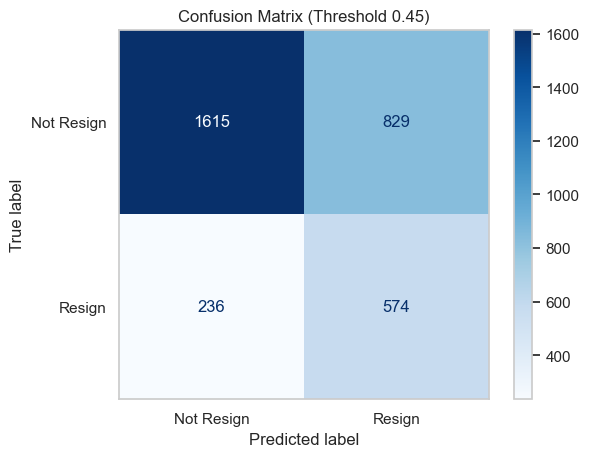

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Prediksi label (pakai threshold 0.45 seperti sebelumnya)
y_proba_test = model_optimum.predict_proba(X_test)[:, 1]
y_pred_optimal = (y_proba_test >= 0.45).astype(int)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)

# 3. Visualisasi
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Resign', 'Resign'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Threshold 0.45)")
plt.grid(False)
plt.show()

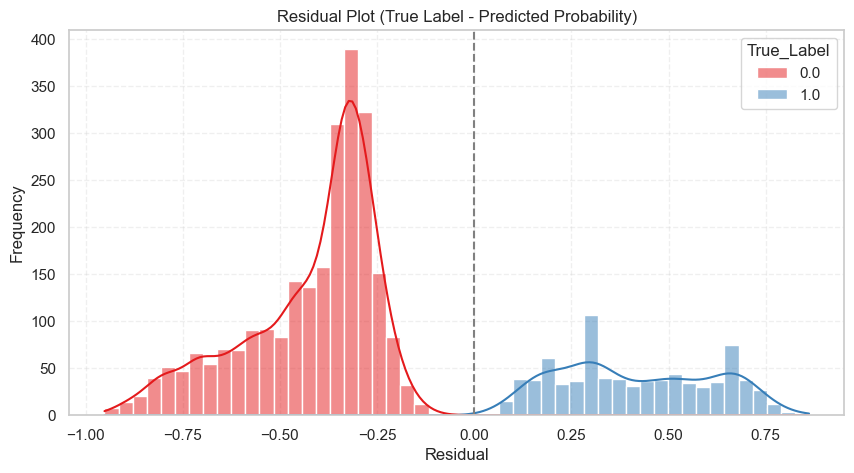

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prediksi probabilitas dan residual
y_proba = model_optimum.predict_proba(X_test)[:, 1]
residuals = y_test - y_proba  # Bisa negatif atau positif

# 2. Buat DataFrame
res_df = pd.DataFrame({
    'Residual': residuals,
    'True_Label': y_test
})

# 3. Plot residual distribusi per kelas
plt.figure(figsize=(10, 5))
sns.histplot(data=res_df, x='Residual', hue='True_Label', bins=50, kde=True, palette='Set1')
plt.title("Residual Plot (True Label - Predicted Probability)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Business Impact Analysis


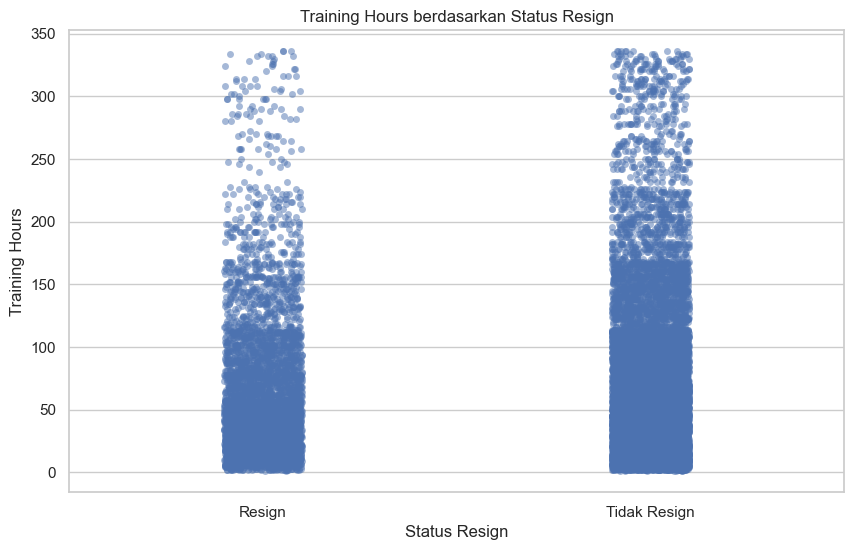

In [54]:
df['resign_status'] = df['target'].map({0: 'Tidak Resign', 1: 'Resign'})

plt.figure(figsize=(10, 6))
sns.stripplot(x='resign_status', y='training_hours', data=df, jitter=True, alpha=0.5)
plt.title('Training Hours berdasarkan Status Resign')
plt.xlabel('Status Resign')
plt.ylabel('Training Hours')
plt.grid(True, axis='y')
plt.show()


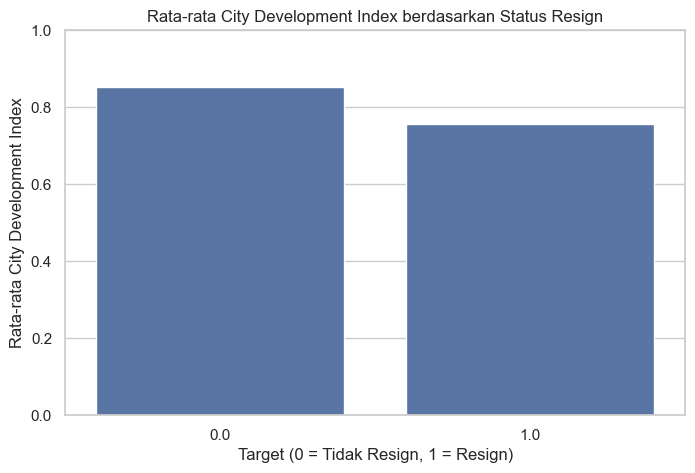

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


avg_cdi = df.groupby('target')['city_development_index'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='target', y='city_development_index', data=avg_cdi)
plt.title('Rata-rata City Development Index berdasarkan Status Resign')
plt.xlabel('Target (0 = Tidak Resign, 1 = Resign)')
plt.ylabel('Rata-rata City Development Index')
plt.ylim(0, 1)  # city_development_index dalam rentang 0-1
plt.grid(True, axis='y')
plt.show()

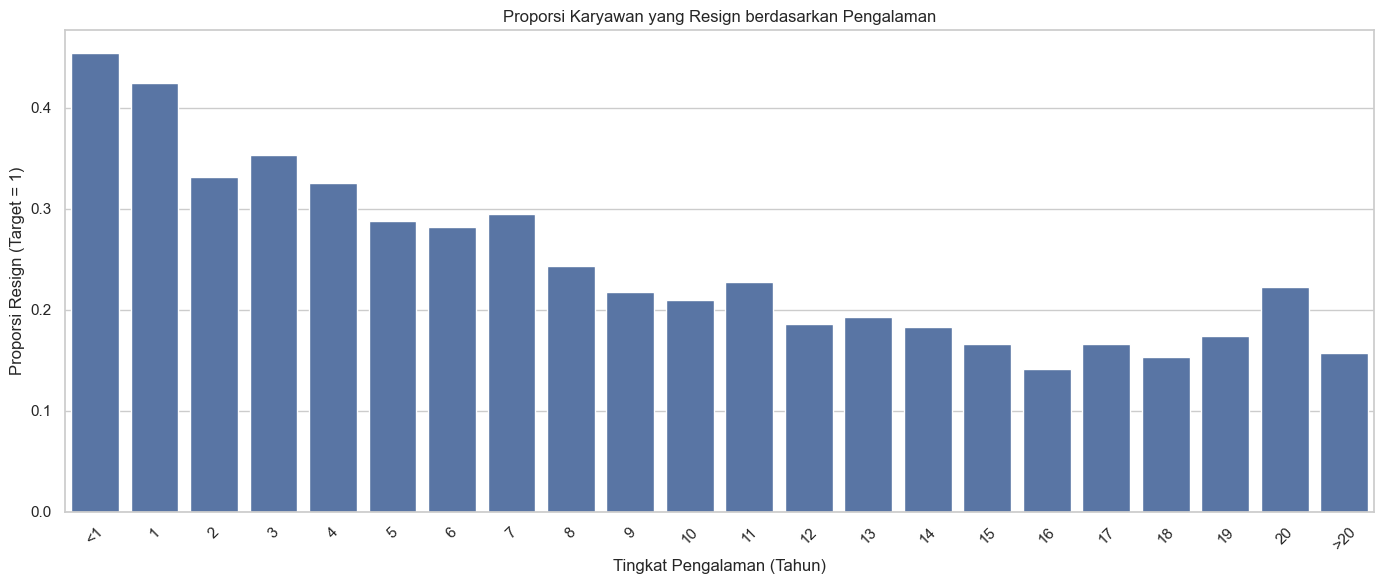

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

experience_target = df.groupby('experience')['target'].mean().reset_index()

# urutan untuk kategori pengalaman
order_mapping = {
    'fresher': -1, '<1': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6,
    '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13,
    '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '>20': 21
}

experience_target['order'] = experience_target['experience'].map(order_mapping)
experience_target = experience_target.sort_values('order')

# Visualisasi barplot
plt.figure(figsize=(14, 6))
sns.barplot(x='experience', y='target', data=experience_target)
plt.title('Proporsi Karyawan yang Resign berdasarkan Pengalaman')
plt.xlabel('Tingkat Pengalaman (Tahun)')
plt.ylabel('Proporsi Resign (Target = 1)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


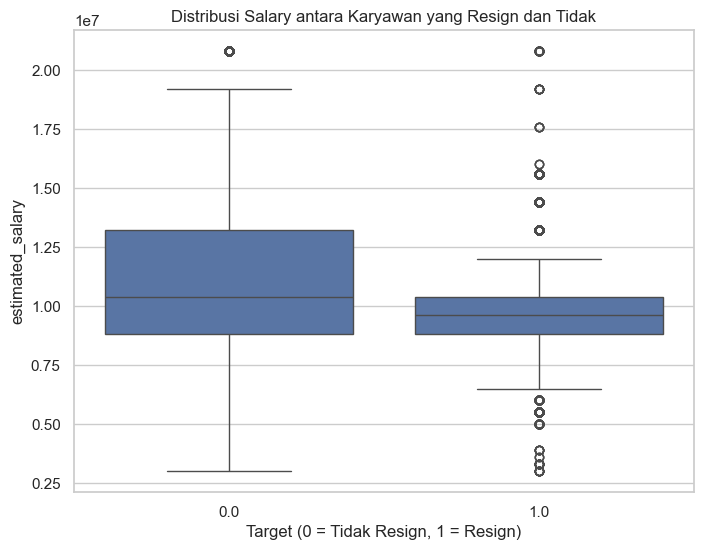

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
salary_mapping_realistic = {
    'Primary School': 3000000,
    'High School': 5000000,
    'Graduate': 8000000,
    'Masters': 12000000,
    'Phd': 16000000
}

# Fungsi estimasi gaji
def estimate_salary(row):
    base_salary = salary_mapping_realistic.get(row['education_level'], 0)
    experience = row['experience']

    if isinstance(experience, str):
        if experience == '<1':
            experience = 0.5
        elif experience == '>20':
            experience = 25
        else:
            try:
                experience = float(experience)
            except:
                return None

    if pd.isna(experience) or base_salary == 0:
        return None
    elif experience <= 1:
        return base_salary
    elif 2 <= experience <= 5:
        return base_salary * 1.10
    elif 6 <= experience <= 10:
        return base_salary * 1.20
    else:
        return base_salary * 1.30

# Terapkan ke dataset
df["estimated_salary"] = df.apply(estimate_salary, axis=1).copy()

# Visualisasi boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='estimated_salary', data=df)
plt.title('Distribusi Salary antara Karyawan yang Resign dan Tidak')
plt.xlabel('Target (0 = Tidak Resign, 1 = Resign)')
plt.ylabel('estimated_salary')
plt.grid(True, axis='y')
plt.show()

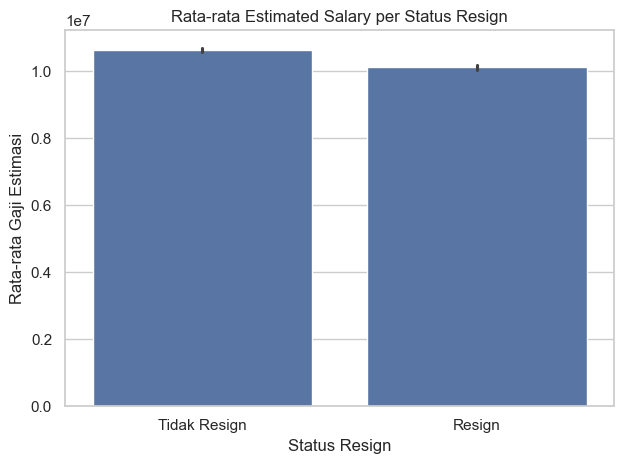

In [58]:
# Visualisasi rata-rata gaji untuk masing-masing status resign
sns.barplot(x='target', y='estimated_salary', data=df)

# Memberi label dan judul
plt.xticks([0, 1], ['Tidak Resign', 'Resign'])
plt.ylabel("Rata-rata Gaji Estimasi")
plt.xlabel("Status Resign")
plt.title("Rata-rata Estimated Salary per Status Resign")
plt.tight_layout()
plt.show()

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Misal y_test = label sebenarnya, y_pred = hasil prediksi
y_pred = model_optimum.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

[[1794  650]
 [ 297  513]]
              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79      2444
         1.0       0.44      0.63      0.52       810

    accuracy                           0.71      3254
   macro avg       0.65      0.68      0.66      3254
weighted avg       0.75      0.71      0.72      3254

Akurasi: 0.7089735709895513


In [60]:
import joblib
joblib.dump(model_optimum, 'model_pipeline_logreg.pkl')
print("Model pipeline Logistic Regression berhasil disimpan sebagai model_pipeline_logreg.pkl")

Model pipeline Logistic Regression berhasil disimpan sebagai model_pipeline_logreg.pkl


In [61]:
print(model)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)


In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_optimum, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation scores: [0.71637503 0.71055381 0.70794148 0.70924765 0.71316614]
Mean CV accuracy: 0.7114568247109381


In [63]:
df_original_for_imputation = pd.read_csv("aug_train.csv").drop(columns=['company_size', 'company_type','enrollee_id'])
# Menghapus outlier dari city_development_index pada salinan ini
Q1_cdi = df_original_for_imputation['city_development_index'].quantile(0.25)
Q3_cdi = df_original_for_imputation['city_development_index'].quantile(0.75)
IQR_cdi = Q3_cdi - Q1_cdi
lower_bound_cdi = Q1_cdi - 1.5 * IQR_cdi
upper_bound_cdi = Q3_cdi + 1.5 * IQR_cdi
outliers_cdi = ((df_original_for_imputation['city_development_index'] < lower_bound_cdi) | (df_original_for_imputation['city_development_index'] > upper_bound_cdi))
df_cleaned_for_imputation = df_original_for_imputation[~outliers_cdi].copy() # .copy() untuk menghindari SettingWithCopyWarning


imputation_values = {}
cols_to_impute = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'last_new_job']
for col in cols_to_impute:
    if df_cleaned_for_imputation[col].dtype == "object":
        imputation_values[col] = df_cleaned_for_imputation[col].mode()[0]
    else: # Meskipun semua di atas adalah objek, ini untuk jaga-jaga
        imputation_values[col] = df_cleaned_for_imputation[col].median()

joblib.dump(imputation_values, 'imputation_values.pkl')
print("Nilai imputasi berhasil disimpan:", imputation_values)

Nilai imputasi berhasil disimpan: {'gender': 'Male', 'enrolled_university': 'no_enrollment', 'education_level': 'Graduate', 'major_discipline': 'STEM', 'experience': '>20', 'last_new_job': '1'}


In [64]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Ambil data fitur training original (sebelum encoding)
df_train_features_original = df_feature_extraction.loc[X_train.index].copy()

# Kolom kategorikal yang akan di-encode
categorical_columns = ['city', 'gender', 'relevent_experience', 
                       'enrolled_university', 'education_level', 
                       'major_discipline', 'experience', 'last_new_job']

label_encoders = {}

for col in categorical_columns:
    if col in df_train_features_original.columns:
        le = LabelEncoder()
        df_train_features_original[col] = df_train_features_original[col].astype(str)
        le.fit(df_train_features_original[col])
        label_encoders[col] = le

# Simpan ke file .pkl
joblib.dump(label_encoders, 'label_encoders.pkl')
print("LabelEncoder berhasil disimpan untuk input pengguna.")

LabelEncoder berhasil disimpan untuk input pengguna.


In [65]:
model_feature_columns = list(X_train.columns)
joblib.dump(model_feature_columns, 'model_feature_columns.pkl')
print("Urutan kolom fitur model berhasil disimpan.")

Urutan kolom fitur model berhasil disimpan.


In [66]:
# Buat DataFrame hasil prediksi
df_result_test = pd.DataFrame(X_test, columns=X.columns)  # Gunakan nama asli fitur jika tersedia
df_result_test['y_actual'] = y_test.values
df_result_test['y_predicted'] = y_pred_test
df_result_test['probability_positive'] = y_proba_test

# Tampilkan 10 data pertama
print("\n📋 Hasil Prediksi Test Set (Sample):")
print(df_result_test.head(10))


📋 Hasil Prediksi Test Set (Sample):
       city  city_development_index  gender  relevent_experience  \
3513     66                   0.698       1                    0   
14428    74                   0.794       1                    1   
18806    64                   0.624       1                    1   
853      30                   0.897       1                    1   
14131    26                   0.827       1                    0   
6412     48                   0.910       1                    1   
9645     64                   0.624       1                    0   
13027    94                   0.855       1                    1   
17724     5                   0.920       1                    1   
1951      4                   0.804       1                    1   

       enrolled_university  education_level  major_discipline  experience  \
3513                     2                0                 5          21   
14428                    0                0                 

In [67]:
df_test_sebelum = X_test.copy()
df_test_sebelum['y_actual'] = y_test.values

print("\n📂 Data Test Sebelum Prediksi:")
df_test_sebelum.head(10)


📂 Data Test Sebelum Prediksi:


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,estimated_salary,y_actual
3513,66,0.698,1,0,2,0,5,21,5,10400000.0,0.0
14428,74,0.794,1,1,0,0,5,17,1,9600000.0,1.0
18806,64,0.624,1,1,2,0,5,17,2,9600000.0,0.0
853,30,0.897,1,1,0,0,5,20,0,8000000.0,1.0
14131,26,0.827,1,0,1,1,5,15,2,5500000.0,0.0
6412,48,0.910,1,1,0,0,5,0,0,8000000.0,0.0
9645,64,0.624,1,0,0,0,5,14,1,8800000.0,0.0
13027,94,0.855,1,1,0,1,5,14,1,5500000.0,0.0
17724,5,0.920,1,1,2,1,5,13,1,5500000.0,0.0
1951,4,0.804,1,1,0,1,5,16,1,6000000.0,0.0


In [68]:
# Buat DataFrame hasil prediksi
df_result_test = pd.DataFrame(X_test_scaled, columns=X.columns)  # Gunakan nama asli fitur jika tersedia
df_result_test['y_actual'] = y_test.values
df_result_test['y_predicted'] = y_pred_test
df_result_test['probability_positive'] = y_proba_test

# Tampilkan 10 data pertama
print("\n📋 Hasil Prediksi Test Set (Sample):")
df_result_test.head(10)


📋 Hasil Prediksi Test Set (Sample):


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,estimated_salary,y_actual,y_predicted,probability_positive
0,0.629887,-1.070659,0.201818,-0.622796,0.568247,-0.693121,0.293494,1.211738,1.809654,-0.032249,0.0,1.0,0.614081
1,0.857794,-0.288902,0.201818,1.605663,-1.932857,-0.693121,0.293494,0.608276,-0.590177,-0.277226,1.0,1.0,0.696801
2,0.572910,-1.673264,0.201818,1.605663,0.568247,-0.693121,0.293494,0.608276,0.009781,-0.277226,0.0,1.0,0.811277
3,-0.395696,0.549858,0.201818,1.605663,-1.932857,-0.693121,0.293494,1.060873,-1.190135,-0.767180,1.0,1.0,0.582066
4,-0.509650,-0.020173,0.201818,-0.622796,-0.682305,0.309941,0.293494,0.306546,0.009781,-1.532734,0.0,0.0,0.397392
5,0.117095,0.655721,0.201818,1.605663,-1.932857,-0.693121,0.293494,-1.956437,-1.190135,-0.767180,0.0,1.0,0.521869
6,0.572910,-1.673264,0.201818,-0.622796,-1.932857,-0.693121,0.293494,0.155680,-0.590177,-0.522203,0.0,1.0,0.787341
7,1.427562,0.207839,0.201818,1.605663,-1.932857,0.309941,0.293494,0.155680,-0.590177,-1.532734,0.0,0.0,0.477285
8,-1.107906,0.737154,0.201818,1.605663,0.568247,0.309941,0.293494,0.004815,-0.590177,-1.532734,0.0,0.0,0.361914
9,-1.136395,-0.207469,0.201818,1.605663,-1.932857,0.309941,0.293494,0.457411,-0.590177,-1.379623,0.0,1.0,0.660773


In [69]:
df_result_test.to_excel('prediksi_test_set.xlsx', index=False)

In [70]:
X_test

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,estimated_salary
3513,66,0.698,1,0,2,0,5,21,5,10400000.0
14428,74,0.794,1,1,0,0,5,17,1,9600000.0
18806,64,0.624,1,1,2,0,5,17,2,9600000.0
853,30,0.897,1,1,0,0,5,20,0,8000000.0
14131,26,0.827,1,0,1,1,5,15,2,5500000.0
...,...,...,...,...,...,...,...,...,...,...
9978,64,0.624,0,1,2,2,5,11,1,13200000.0
192,48,0.910,1,1,0,2,5,4,3,15600000.0
17488,64,0.624,1,0,2,0,5,1,1,9600000.0
17974,64,0.624,1,0,2,0,5,2,1,10400000.0
